# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display
from matplotlib.ticker import FuncFormatter

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

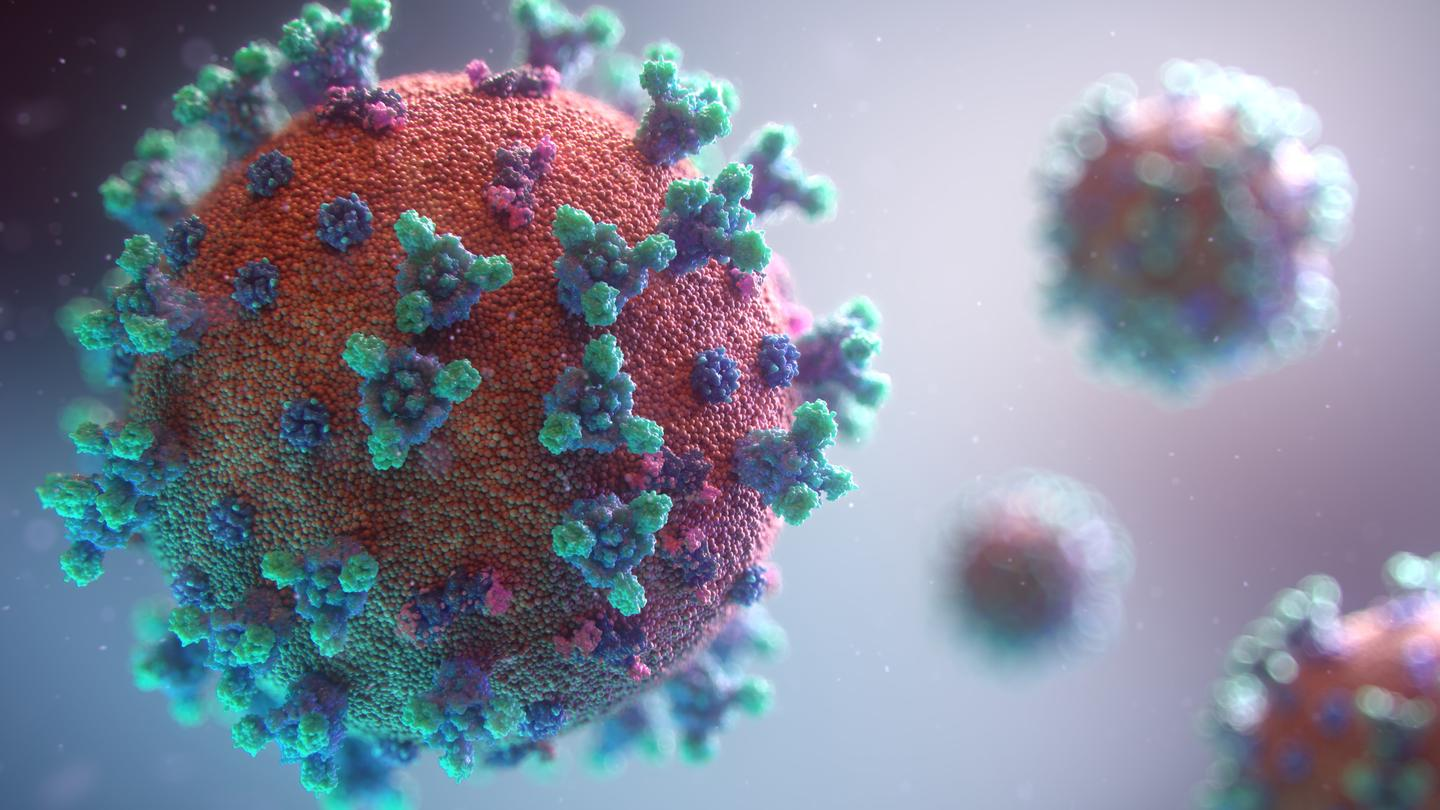

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(223297, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223297 entries, 0 to 223296
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    223297 non-null  object 
 1   continent                                   210468 non-null  object 
 2   location                                    223297 non-null  object 
 3   date                                        223297 non-null  object 
 4   total_cases                                 214149 non-null  float64
 5   new_cases                                   213918 non-null  float64
 6   new_cases_smoothed                          212722 non-null  float64
 7   total_deaths                                194997 non-null  float64
 8   new_deaths                                  194943 non-null  float64
 9   new_deaths_smoothed                         193763 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         1016
MEX         1016
THA         1013
TWN         1001
MAC          995
OWID_WRL     995
OWID_UMC     995
KOR          995
CHN          995
USA          995
Name: iso_code, dtype: int64

# Helper Functions

In [10]:
# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)




def cntplot(data: pd.DataFrame, orient: str, palette: str|list|dict, dodge: bool, x=None, y=None, hue=None, order=None, hue_order=None, color=None, ax=None):
  '''
  
  Helper function for plotting countplots

  Parameters
  ----------

  data: pd.DataFrame
        pandas dataframe

  orient: str
        orientation of the plot
  
  palette: palette name, list or dict
        colors to use for different levels

  dodge: bool
        whether elements should be shifted along the categorial axis

  x,y,hue: None
        inputs for plotting long-form data

  Returns: ax
        Returns the axes object with the plot drawn
        
  '''

  return sns.countplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, orient=orient, color=color, palette=palette, dodge=dodge, ax=ax)



def plot_pie(shadow: bool, startangle: float, normalize: bool, x=None, labels=None, explode=None, autopct=None, data=None):
      '''
      Helper function for plotting pie charts

      Parameters
      ----------

      data: pd.DataFrame
           pandas dataframe

      x: None
           array like
      
      explode: None
            fraction of radius to offset each wedge
      
      autopct: None
            string function to label chart

      shadow: True
            draw shadow beneath the pie
      
      normalize: bool
            when true, makes a full pie 

      startangle: float
            angle by which the start of the pie is rotated
            

      Returns: pie chart
      
      '''

      return plt.pie(x=x, explode=explode, labels=labels, autopct=autopct, shadow=shadow, startangle=startangle, normalize=normalize, data=data)


In [11]:
df['continent'].value_counts()                                                                            

Africa           51573
Europe           48249
Asia             48055
North America    34306
Oceania          15895
South America    12390
Name: continent, dtype: int64

[Text(0.5, 1.0, 'Countplot of Continents')]

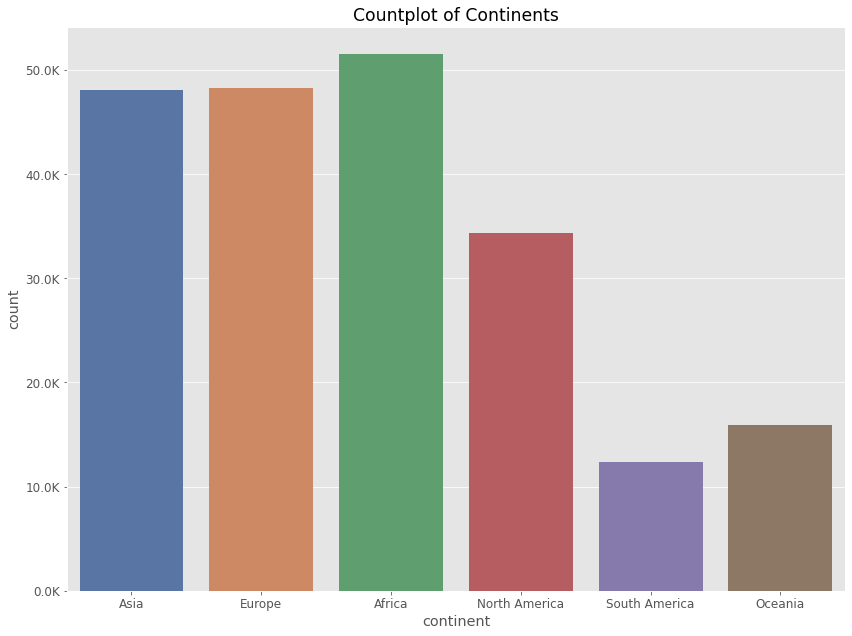

In [12]:
fig, ax = plt.subplots()

cntplot(data=df, x='continent', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))
ax.set(title='Countplot of Continents')

In [13]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.245
Europe           0.229
Asia             0.228
North America    0.163
Oceania          0.076
South America    0.059
Name: continent, dtype: float64

[Text(0.5, 1.0, 'Pie chart of the relative frequency for each continent')]

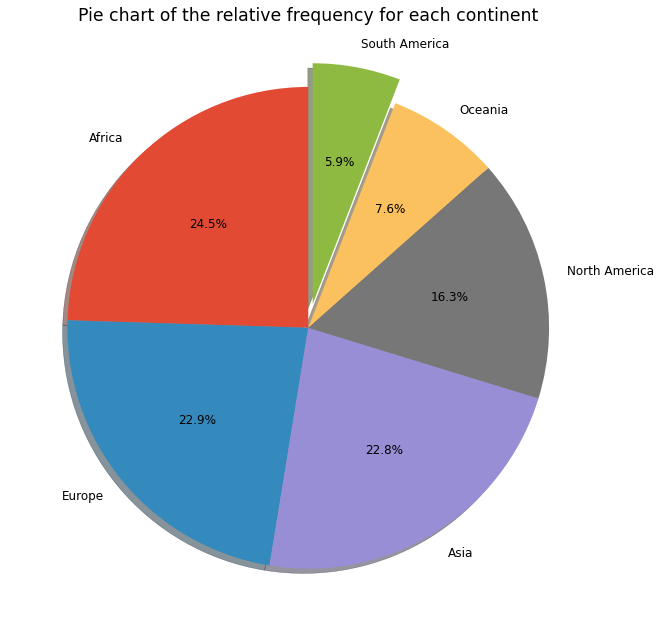

In [14]:
fig, ax = plt.subplots()

plot_pie(
  x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0, 0, 0, 0, 0.1]
)

ax.set(title='Pie chart of the relative frequency for each continent')

In [15]:
df['location'].value_counts().head(10)

Argentina              1016
Mexico                 1016
Thailand               1013
Taiwan                 1001
Macao                   995
World                   995
Upper middle income     995
South Korea             995
China                   995
United States           995
Name: location, dtype: int64

In [16]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    223297    210468     223297      223297           106788
unique      244         6        244        1016                4
top         ARG    Africa  Argentina  2021-09-19  tests performed
freq       1016     51573       1016         243            80099

In [17]:
df['tests_units'].value_counts()

tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: tests_units, dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

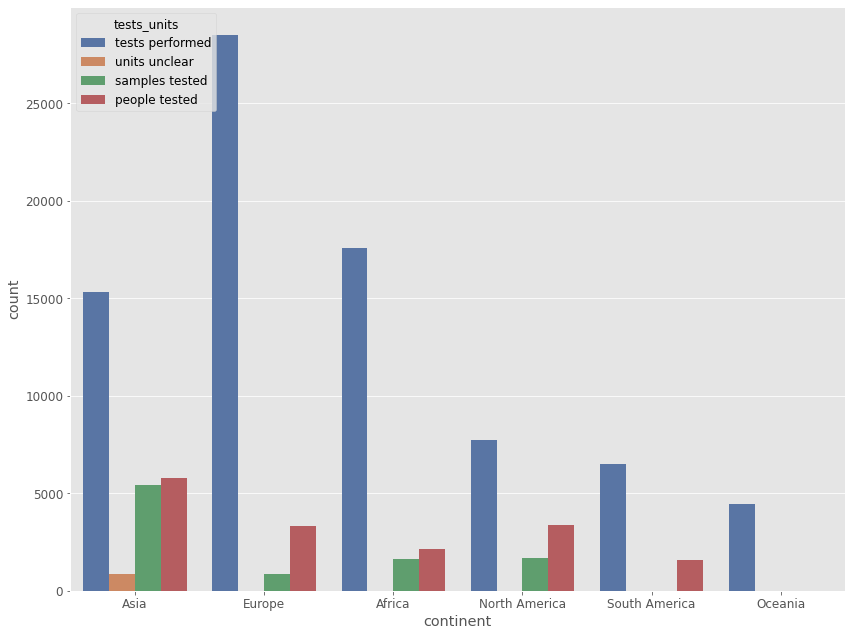

In [18]:
cntplot(data=df, orient='v', palette='deep', dodge=True, x='continent', hue='tests_units')

In [19]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.14149e+05  2.13918e+05         2.12722e+05   1.94997e+05   
mean   4.34925e+06  1.24211e+04         1.24551e+04   7.33710e+04   
std    2.72203e+07  8.56383e+04         8.36986e+04   3.77655e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.19400e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.77440e+04  5.50000e+01         9.55710e+01   1.15400e+03   
75%    5.15571e+05  9.68000e+02         1.13443e+03   9.69100e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194943.00000         193763.00000             213170.00000   
mean      139.78043            140.49396              58765.58103   
std       734.30526            719.87926             104602.05760   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1054.17775   
50%         1.00000              1.57100               9975.92400   
75%        14.00000             16.00000              70728.33400   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212939.00000                    211748.00000   
mean               189.94524                       190.24368   
std               1054.92327                       669.45864   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36800   
50%                  7.76400                        19.57750   
75%                 98.16100                       136.27775   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              194031.00000            193977.00000   
mean                  683.74596                 1.41716   
std                   969.83488                 5.11684   
min                     0.00000                 0.00000   
25%                    29.04500                 0.00000   
50%                   208.20800                 0.03500   
75%                  1013.74200                 0.98500   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192802.00000       166717.00000   28361.00000   
mean                           1.41703            0.94681     827.29117   
std                            3.35187            0.38405    2465.62721   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.20900            0.97000     151.00000   
75%                            1.35100            1.15000     567.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28361.00000    31138.00000                31138.00000   
mean                   20.83728     4148.20615                  156.00186   
std                    26.15564    10756.19238                  191.01915   
min                     0.00000        0.00000                    0.00000   
25%                     3.76300      173.00000                   33.04700   
50%                    10.36500      811.00000                   87.80900   
75%                    28.83200     3171.00000                  198.26900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7357.00000                         7357.00000   
mean               421.02284                           12.96613   
std                580.21884                           15.07002   
min             

In [20]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
223292 2022-10-08
223293 2022-10-09
223294 2022-10-10
223295 2022-10-11
223296 2022-10-12

[223297 rows x 1 columns]

In [21]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
223292  2022         10    8   Saturday
223293  2022         10    9     Sunday
223294  2022         10   10     Monday
223295  2022         10   11    Tuesday
223296  2022         10   12  Wednesday

[223297 rows x 4 columns]

In [22]:
# assign month names
df['month_name'] = df['month_num'].map(
                                       {
                                         1: 'Jan',
                                         2: 'Feb',
                                         3: 'Mar',
                                         4: 'Apr',
                                         5: 'May',
                                         6: 'June',
                                         7: 'July',
                                         8: 'Aug',
                                         9: 'Sep',
                                         10: 'Oct',
                                         11: 'Nov',
                                         12: 'Dec'
                                       }
                                    )

df[['month_num', 'month_name']].value_counts(ascending=False)

month_num  month_name
7          July          21774
5          May           21719
8          Aug           21718
6          June          21091
9          Sep           20984
4          Apr           20770
3          Mar           19631
10         Oct           17284
1          Jan           14919
2          Feb           14764
12         Dec           14543
11         Nov           14100
dtype: int64

<AxesSubplot:xlabel='month_name', ylabel='count'>

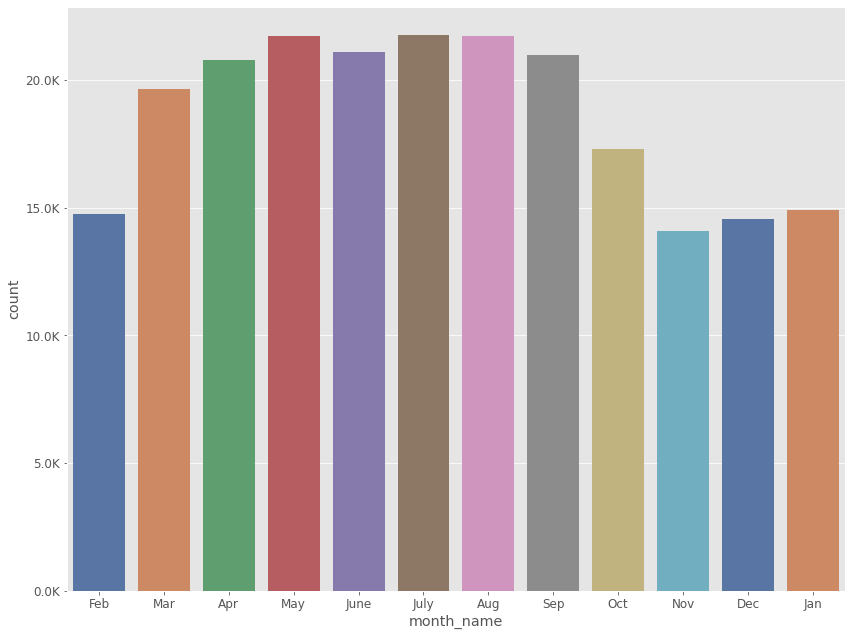

In [23]:
fig, ax = plt.subplots()

cntplot(data=df, x='month_name', palette='deep', orient='v', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))

In [24]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

# Missing Data Exploration

In [25]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      12829
location                                           0
date                                               0
total_cases                                     9148
new_cases                                       9379
new_cases_smoothed                             10575
total_deaths                                   28300
new_deaths                                     28354
new_deaths_smoothed                            29534
total_cases_per_million                        10127
new_cases_per_million                          10358
new_cases_smoothed_per_million                 11549
total_deaths_per_million                       29266
new_deaths_per_million                         29320
new_deaths_smoothed_per_million                30495
reproduction_rate                              56580
icu_patients                                  194936
icu_patients_per_million                      

<AxesSubplot:>

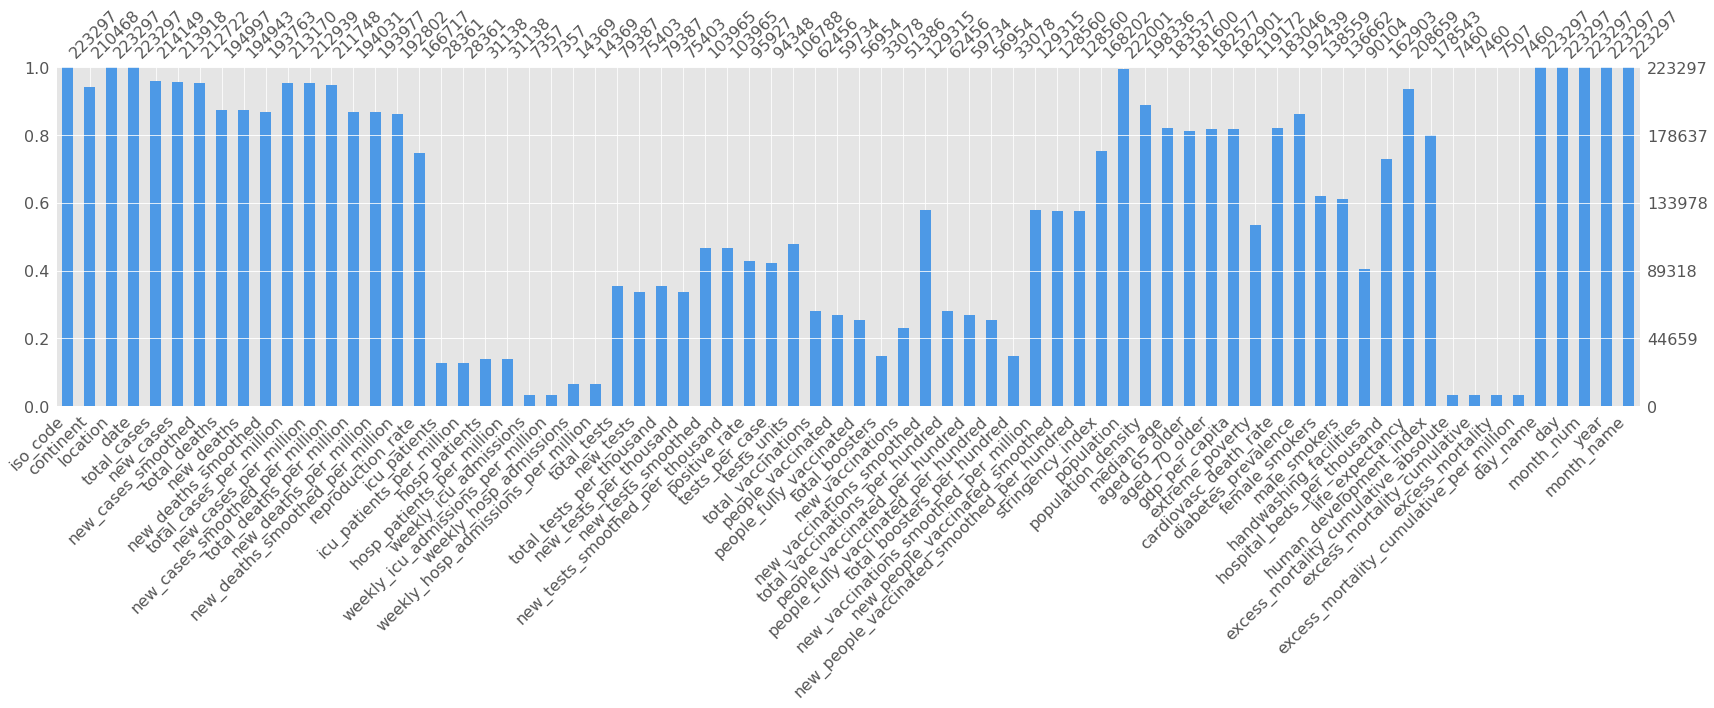

In [26]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

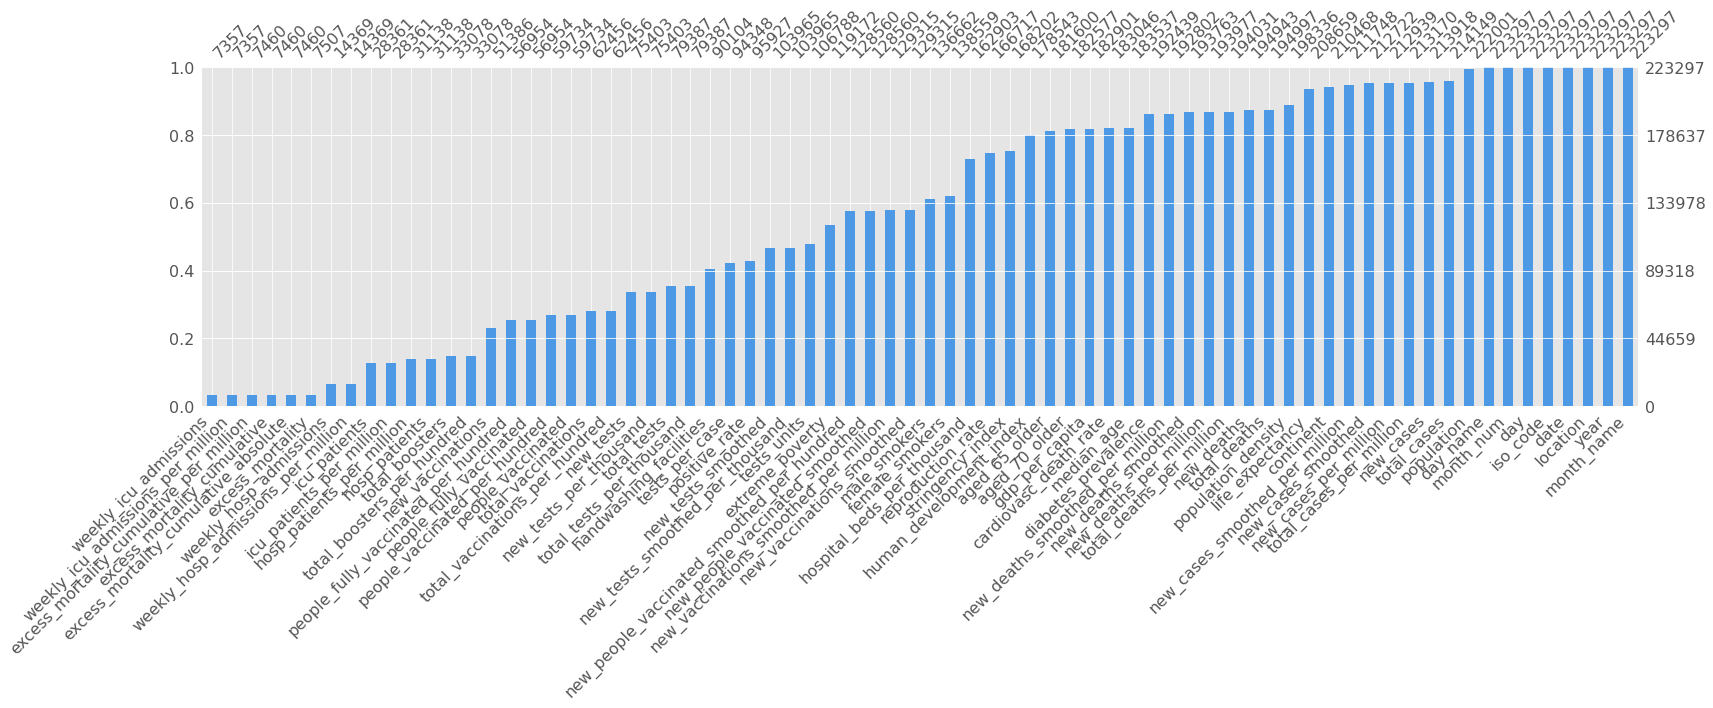

In [27]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [28]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
223292      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   
223293      ZWE    Africa     Zimbabwe 2022-10-09     257655.0        0.0   
223294      ZWE    Africa     Zimbabwe 2022-10-10     257749.0       94.0   
223295      ZWE    Africa     Zimbabwe 2022-10-11     257749.0        0.0   
223296      ZWE    Africa     Zimbabwe 2022-10-12     257798.0       49.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
223292              27.143        5604.0         0.0                0.286   
223293              19.714        5604.0         0.0                0.286   
223294              30.143        5604.0         0.0                0.143   
223295              25.857        5604.0         0.0                0.143   
223296              32.857        5604.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
223292                16109.958                  0.000   
223293                16109.958                  0.000   
223294                16115.835                  5.877   
223295                16115.835                  0.000   
223296                16118.899                  3.064   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
223292                           1.697                   350.392   
223293                           1.233                   350.392   
223294                           1.885                   350.392   
223295                           1.617                   350.392   
223296                           2.054                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
223292                     0.0                            0.018   
223293                     0.0                            0.018   
223294                     0.0          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [29]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [30]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
223292      ZWE     Zimbabwe 2022-10-08   Saturday    8         10  2022   
223293      ZWE     Zimbabwe 2022-10-09     Sunday    9         10  2022   
223294      ZWE     Zimbabwe 2022-10-10     Monday   10         10  2022   
223295      ZWE     Zimbabwe 2022-10-11    Tuesday   11         10  2022   
223296      ZWE     Zimbabwe 2022-10-12  Wednesday   12         10  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
223292        Oct  
223293        Oct  
223294        Oct  
223295        Oct  
223296        Oct  

[223297 rows x 8 columns]

Filling the missing data

In [31]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
223292      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   
223293      ZWE    Africa     Zimbabwe 2022-10-09     257655.0        0.0   
223294      ZWE    Africa     Zimbabwe 2022-10-10     257749.0       94.0   
223295      ZWE    Africa     Zimbabwe 2022-10-11     257749.0        0.0   
223296      ZWE    Africa     Zimbabwe 2022-10-12     257798.0       49.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
223292              27.143        5604.0         0.0                0.286   
223293              19.714        5604.0         0.0                0.286   
223294              30.143        5604.0         0.0                0.143   
223295              25.857        5604.0         0.0                0.143   
223296              32.857        5604.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
223292                16109.958                  0.000   
223293                16109.958                  0.000   
223294                16115.835                  5.877   
223295                16115.835                  0.000   
223296                16118.899                  3.064   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
223292                           1.697                   350.392   
223293                           1.233                   350.392   
223294                           1.885                   350.392   
223295                           1.617                   350.392   
223296                           2.054                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
223292                     0.0                            0.018   
223293                     0.0                            0.018   
223294                     0.0          

Fill with Mean / Median of Group

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.09107e+05  2.09107e+05         2.09107e+05   2.05934e+05   
mean   4.27958e+06  1.21078e+04         1.21394e+04   6.86339e+04   
std    2.75136e+07  8.62631e+04         8.42401e+04   3.68418e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.47600e+03  0.00000e+00         5.42900e+00   7.90000e+01   
50%    4.01780e+04  4.60000e+01         7.97140e+01   7.93000e+02   
75%    4.21161e+05  8.12000e+02         9.32143e+02   7.37800e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205934.00000         205934.00000             208128.00000   
mean      130.79668            131.34072              55269.90740   
std       715.20030            700.40330             100776.48286   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.01036                952.45738   
50%         0.57692              1.00000               8839.24050   
75%        11.00000             11.85700              65655.24450   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           208128.00000                    208128.00000   
mean               182.13852                       181.94265   
std               1052.88236                       659.09753   
min                  0.00000                         0.00000   
25%                  0.00000                         1.23575   
50%                  6.77600                        17.28850   
75%                 88.90000                       126.33200   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204955.00000            204955.00000   
mean                  633.89285                 1.39621   
std                   928.67036                 4.95876   
min                     0.00000                 0.00000   
25%                    29.29600                 0.00000   
50%                   191.08200                 0.06800   
75%                   928.05950                 1.07600   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204955.00000       174990.00000   29967.00000   
mean                           1.38888            0.93475     758.50278   
std                            3.23769            0.37563    2507.73558   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      25.00000   
50%                            0.22100            0.96000      88.00000   
75%                            1.38250            1.13000     492.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29967.00000    32005.00000                32005.00000   
mean                   18.23858     3959.59650                  148.85604   
std                    21.77690    10734.09714                  181.32031   
min                     0.00000        0.00000                    0.00000   
25%                     4.50200      173.00000                   40.01700   
50%                     9.41500      789.85714                   85.02100   
75%                    27.35500     2914.00000                  191.64000   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10138.00000                        10138.00000   
mean               166.10054                           11.16743   
std                291.28670                            8.62054   
min             

In [33]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.09107e+05  2.09107e+05         2.09107e+05   2.05934e+05   
mean   4.27884e+06  1.21009e+04         1.21117e+04   6.87243e+04   
std    2.75133e+07  8.62633e+04         8.41992e+04   3.68557e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.58500e+03  0.00000e+00         5.14300e+00   7.70000e+01   
50%    4.01780e+04  4.50000e+01         7.90000e+01   7.95000e+02   
75%    4.19830e+05  8.06000e+02         9.17215e+02   7.37300e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205934.00000         205934.00000             208128.00000   
mean      130.31854            130.83767              55465.53771   
std       715.11781            700.25337             101311.16991   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                941.77025   
50%         0.00000              0.85700               8700.78250   
75%        10.00000             11.28600              65594.34350   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           208128.00000                    208128.00000   
mean               177.49470                       176.63319   
std               1050.33983                       654.62573   
min                  0.00000                         0.00000   
25%                  0.00000                         1.14400   
50%                  6.25700                        16.53150   
75%                 85.81800                       121.39700   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204955.00000            204955.00000   
mean                  639.35064                 1.26924   
std                   932.33823                 4.94779   
min                     0.00000                 0.00000   
25%                    28.75400                 0.00000   
50%                   193.39400                 0.00000   
75%                   932.01750                 0.75300   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204955.00000       174990.00000   29967.00000   
mean                           1.27560            0.92972     732.65115   
std                            3.21735            0.37979    2466.69966   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      23.00000   
50%                            0.13900            0.96000      88.00000   
75%                            1.15500            1.13000     447.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29967.00000    32005.00000                32005.00000   
mean                   17.42468     3738.44051                  142.72742   
std                    22.01356    10444.62141                  180.68316   
min                     0.00000        0.00000                    0.00000   
25%                     3.12800      172.00000                   39.50600   
50%                     9.20400      762.00000                   76.14350   
75%                    23.12650     2815.00000                  169.72600   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10138.00000                        10138.00000   
mean               132.08226                            6.98773   
std                258.00939                            3.55074   
min             

In [34]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.14149e+05  2.13918e+05         2.12722e+05   1.94997e+05   
mean   4.34925e+06  1.24211e+04         1.24551e+04   7.33710e+04   
std    2.72203e+07  8.56383e+04         8.36986e+04   3.77655e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.19400e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.77440e+04  5.50000e+01         9.55710e+01   1.15400e+03   
75%    5.15571e+05  9.68000e+02         1.13443e+03   9.69100e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194943.00000         193763.00000             213170.00000   
mean      139.78043            140.49396              58765.58103   
std       734.30526            719.87926             104602.05760   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1054.17775   
50%         1.00000              1.57100               9975.92400   
75%        14.00000             16.00000              70728.33400   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212939.00000                    211748.00000   
mean               189.94524                       190.24368   
std               1054.92327                       669.45864   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36800   
50%                  7.76400                        19.57750   
75%                 98.16100                       136.27775   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              194031.00000            193977.00000   
mean                  683.74596                 1.41716   
std                   969.83488                 5.11684   
min                     0.00000                 0.00000   
25%                    29.04500                 0.00000   
50%                   208.20800                 0.03500   
75%                  1013.74200                 0.98500   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192802.00000       166717.00000   28361.00000   
mean                           1.41703            0.94681     827.29117   
std                            3.35187            0.38405    2465.62721   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.20900            0.97000     151.00000   
75%                            1.35100            1.15000     567.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28361.00000    31138.00000                31138.00000   
mean                   20.83728     4148.20615                  156.00186   
std                    26.15564    10756.19238                  191.01915   
min                     0.00000        0.00000                    0.00000   
25%                     3.76300      173.00000                   33.04700   
50%                    10.36500      811.00000                   87.80900   
75%                    28.83200     3171.00000                  198.26900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7357.00000                         7357.00000   
mean               421.02284                           12.96613   
std                580.21884                           15.07002   
min             

Forward Fill & Back Fill within Groups

In [35]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.06800e+05  2.06800e+05         2.05644e+05   1.87683e+05   
mean   4.32320e+06  1.22358e+04         1.22676e+04   7.42573e+04   
std    2.76624e+07  8.67346e+04         8.48375e+04   3.84782e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.77000e+03  0.00000e+00         5.57100e+00   1.03000e+02   
50%    4.17975e+04  4.70000e+01         8.18570e+01   9.85000e+02   
75%    4.24447e+05  8.23000e+02         9.35857e+02   8.49450e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

        new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  187861.0000          186741.0000             205821.00000   
mean      142.1986             142.8869              55286.34641   
std       747.4983             732.8879             101026.71263   
min         0.0000               0.0000                  0.00100   
25%         0.0000               0.0000                965.52300   
50%         1.0000               1.2860               8831.61200   
75%        12.0000              13.7140              65451.10500   
max     17737.0000           14858.2860             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           205821.00000                    204670.00000   
mean               179.89052                       179.10086   
std               1058.33404                       660.30616   
min                  0.00000                         0.00000   
25%                  0.00000                         1.22400   
50%                  6.57800                        16.96700   
75%                 87.52300                       123.43975   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              186717.00000            186895.00000   
mean                  653.31570                 1.38524   
std                   956.86304                 5.32459   
min                     0.00000                 0.00000   
25%                    27.65200                 0.00000   
50%                   187.28400                 0.02200   
75%                   952.66400                 0.89700   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     185780.00000       161520.00000   26652.00000   
mean                           1.37738            0.93843     689.65639   
std                            3.36241            0.38906    2493.80068   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      20.00000   
50%                            0.18300            0.96000      83.00000   
75%                            1.27000            1.15000     361.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               26652.00000    28789.00000                28789.00000   
mean                   17.21702     3660.12012                  148.57777   
std                    23.06565    10761.88236                  190.64826   
min                     0.00000        0.00000                    0.00000   
25%                     2.77075      136.00000                   30.37500   
50%                     7.59400      675.00000                   83.16400   
75%                    21.88200     2465.00000                  177.57700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6771.00000                         6771.00000   
mean                52.99616                           12.19436   
std                114.64106                           20.45439   
min                  0.00

In [36]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.09107e+05  2.09037e+05         2.09037e+05   2.05934e+05   
mean   4.27551e+06  1.21011e+04         1.20677e+04   6.76763e+04   
std    2.75131e+07  8.62781e+04         8.41604e+04   3.67941e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.30100e+03  0.00000e+00         4.71400e+00   4.40000e+01   
50%    3.93360e+04  4.40000e+01         7.52860e+01   6.71000e+02   
75%    4.14962e+05  7.98000e+02         8.97714e+02   6.87800e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205896.00000         205896.00000             208128.00000   
mean      129.87102            129.62446              54674.35318   
std       715.16213            699.18649             100631.39604   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                910.04600   
50%         1.00000              0.85700               8287.94700   
75%        10.00000             10.57100              64474.77600   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           208058.00000                    208058.00000   
mean               178.24982                       176.19143   
std               1050.50880                       654.86274   
min                  0.00000                         0.00000   
25%                  0.00000                         1.13500   
50%                  6.55500                        16.23900   
75%                 88.04400                       119.60500   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204955.00000            204917.00000   
mean                  596.84523                 2.92501   
std                   931.06410                12.99505   
min                     0.00000                 0.00000   
25%                    17.51100                 0.00000   
50%                   138.26200                 0.06200   
75%                   845.89800                 1.24500   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204917.00000       172951.00000   29262.00000   
mean                           1.58369            0.97877     708.81669   
std                            3.84350            0.44488    2475.85614   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      21.00000   
50%                            0.20000            0.97000      88.00000   
75%                            1.42800            1.18000     361.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29262.00000    30839.00000                30839.00000   
mean                   17.30429     3707.31677                  138.85220   
std                    22.69096    10658.57946                  186.38405   
min                     0.00000        0.00000                    0.00000   
25%                     2.73600      154.00000                   29.08500   
50%                     8.02450      727.00000                   71.16300   
75%                    22.75975     2398.00000                  165.08900   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9722.00000                         9722.00000   
mean               135.62107                           11.14533   
std                323.75156                           17.76034   
min             

In [37]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.14149e+05  2.13918e+05         2.12722e+05   1.94997e+05   
mean   4.34925e+06  1.24211e+04         1.24551e+04   7.33710e+04   
std    2.72203e+07  8.56383e+04         8.36986e+04   3.77655e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.19400e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.77440e+04  5.50000e+01         9.55710e+01   1.15400e+03   
75%    5.15571e+05  9.68000e+02         1.13443e+03   9.69100e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194943.00000         193763.00000             213170.00000   
mean      139.78043            140.49396              58765.58103   
std       734.30526            719.87926             104602.05760   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1054.17775   
50%         1.00000              1.57100               9975.92400   
75%        14.00000             16.00000              70728.33400   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212939.00000                    211748.00000   
mean               189.94524                       190.24368   
std               1054.92327                       669.45864   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36800   
50%                  7.76400                        19.57750   
75%                 98.16100                       136.27775   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              194031.00000            193977.00000   
mean                  683.74596                 1.41716   
std                   969.83488                 5.11684   
min                     0.00000                 0.00000   
25%                    29.04500                 0.00000   
50%                   208.20800                 0.03500   
75%                  1013.74200                 0.98500   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192802.00000       166717.00000   28361.00000   
mean                           1.41703            0.94681     827.29117   
std                            3.35187            0.38405    2465.62721   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.20900            0.97000     151.00000   
75%                            1.35100            1.15000     567.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28361.00000    31138.00000                31138.00000   
mean                   20.83728     4148.20615                  156.00186   
std                    26.15564    10756.19238                  191.01915   
min                     0.00000        0.00000                    0.00000   
25%                     3.76300      173.00000                   33.04700   
50%                    10.36500      811.00000                   87.80900   
75%                    28.83200     3171.00000                  198.26900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7357.00000                         7357.00000   
mean               421.02284                           12.96613   
std                580.21884                           15.07002   
min             

Combining FFill and BFill

In [38]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.15940e+05  2.15940e+05         2.15940e+05   2.15940e+05   
mean   4.14022e+06  1.17180e+04         1.16840e+04   6.45405e+04   
std    2.70847e+07  8.49149e+04         8.28313e+04   3.59597e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.32400e+03  0.00000e+00         3.57100e+00   2.70000e+01   
50%    3.46410e+04  3.60000e+01         6.68570e+01   5.10000e+02   
75%    3.82861e+05  7.32000e+02         8.34179e+02   6.13825e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  215940.00000         215940.00000             215940.00000   
mean      123.87378            123.65240              52696.66450   
std       698.81655            683.27285              99320.34366   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                678.89100   
50%         1.00000              0.71400               6824.20200   
75%         8.00000              9.42900              61401.75575   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           215940.00000                    215940.00000   
mean               172.50946                       169.97059   
std               1033.85848                       644.02679   
min                  0.00000                         0.00000   
25%                  0.00000                         0.79500   
50%                  5.39100                        13.84000   
75%                 82.92600                       111.75700   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              215940.00000            215940.00000   
mean                  566.66081                 2.95672   
std                   916.39699                12.82815   
min                     0.00000                 0.00000   
25%                    12.82000                 0.00000   
50%                   110.77450                 0.06750   
75%                   766.79400                 1.18625   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     215940.00000       215940.00000  204139.00000   
mean                           1.55109            1.07949     286.43306   
std                            3.78438            0.65119    1066.27538   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.79000       0.00000   
50%                            0.17800            1.00000      10.00000   
75%                            1.37600            1.25000     111.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              204139.00000   204139.00000               204139.00000   
mean                    7.98779     1376.56914                   44.56013   
std                    13.98556     4673.75317                   89.63766   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200      156.00000                   15.73300   
75%                     9.18900      636.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           181969.00000                       181969.00000   
mean               215.69198                           10.17025   
std                581.90974                           11.85708   
min             

In [39]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.14149e+05  2.13918e+05         2.12722e+05   1.94997e+05   
mean   4.34925e+06  1.24211e+04         1.24551e+04   7.33710e+04   
std    2.72203e+07  8.56383e+04         8.36986e+04   3.77655e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.19400e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.77440e+04  5.50000e+01         9.55710e+01   1.15400e+03   
75%    5.15571e+05  9.68000e+02         1.13443e+03   9.69100e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194943.00000         193763.00000             213170.00000   
mean      139.78043            140.49396              58765.58103   
std       734.30526            719.87926             104602.05760   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1054.17775   
50%         1.00000              1.57100               9975.92400   
75%        14.00000             16.00000              70728.33400   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212939.00000                    211748.00000   
mean               189.94524                       190.24368   
std               1054.92327                       669.45864   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36800   
50%                  7.76400                        19.57750   
75%                 98.16100                       136.27775   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              194031.00000            193977.00000   
mean                  683.74596                 1.41716   
std                   969.83488                 5.11684   
min                     0.00000                 0.00000   
25%                    29.04500                 0.00000   
50%                   208.20800                 0.03500   
75%                  1013.74200                 0.98500   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192802.00000       166717.00000   28361.00000   
mean                           1.41703            0.94681     827.29117   
std                            3.35187            0.38405    2465.62721   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.20900            0.97000     151.00000   
75%                            1.35100            1.15000     567.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28361.00000    31138.00000                31138.00000   
mean                   20.83728     4148.20615                  156.00186   
std                    26.15564    10756.19238                  191.01915   
min                     0.00000        0.00000                    0.00000   
25%                     3.76300      173.00000                   33.04700   
50%                    10.36500      811.00000                   87.80900   
75%                    28.83200     3171.00000                  198.26900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7357.00000                         7357.00000   
mean               421.02284                           12.96613   
std                580.21884                           15.07002   
min             

In [40]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby(['location']).transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           209.77052    4560.10064     8.35867              8.40104   
1           209.77052    4560.10064     8.35867              8.40104   
2           209.77052    4560.10064     8.35867              8.40104   
3           209.77052    4560.10064     8.35867              8.40104   
4           209.77052    4560.10064     8.35867              8.40104   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         5.23126                 113.71976   
1                         5.23126                 113.71976   
2                         5.23126                 113.71976   
3                         5.23126                 113.71976   
4                         5.23126                 113.71976   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                 0.20851                          0.20955            1.06365   
1                 0.20851                          0.20955            1.06365   
2                 0.20851                          0.20955            1.06365   
3                 0.20851                          0.20955            1.06365   
4                 0.20851                          0.20955            1.06365   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

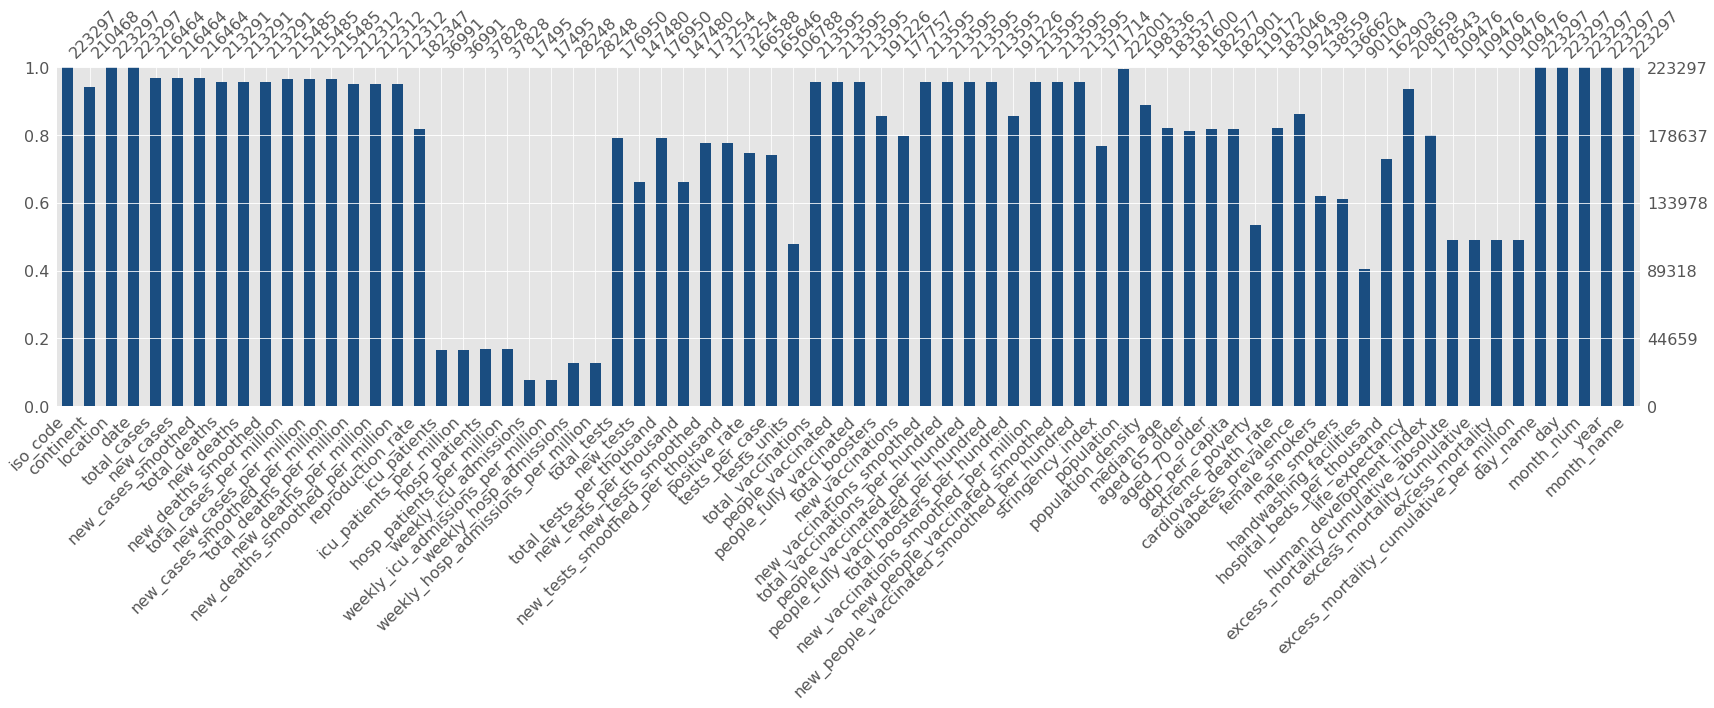

In [41]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

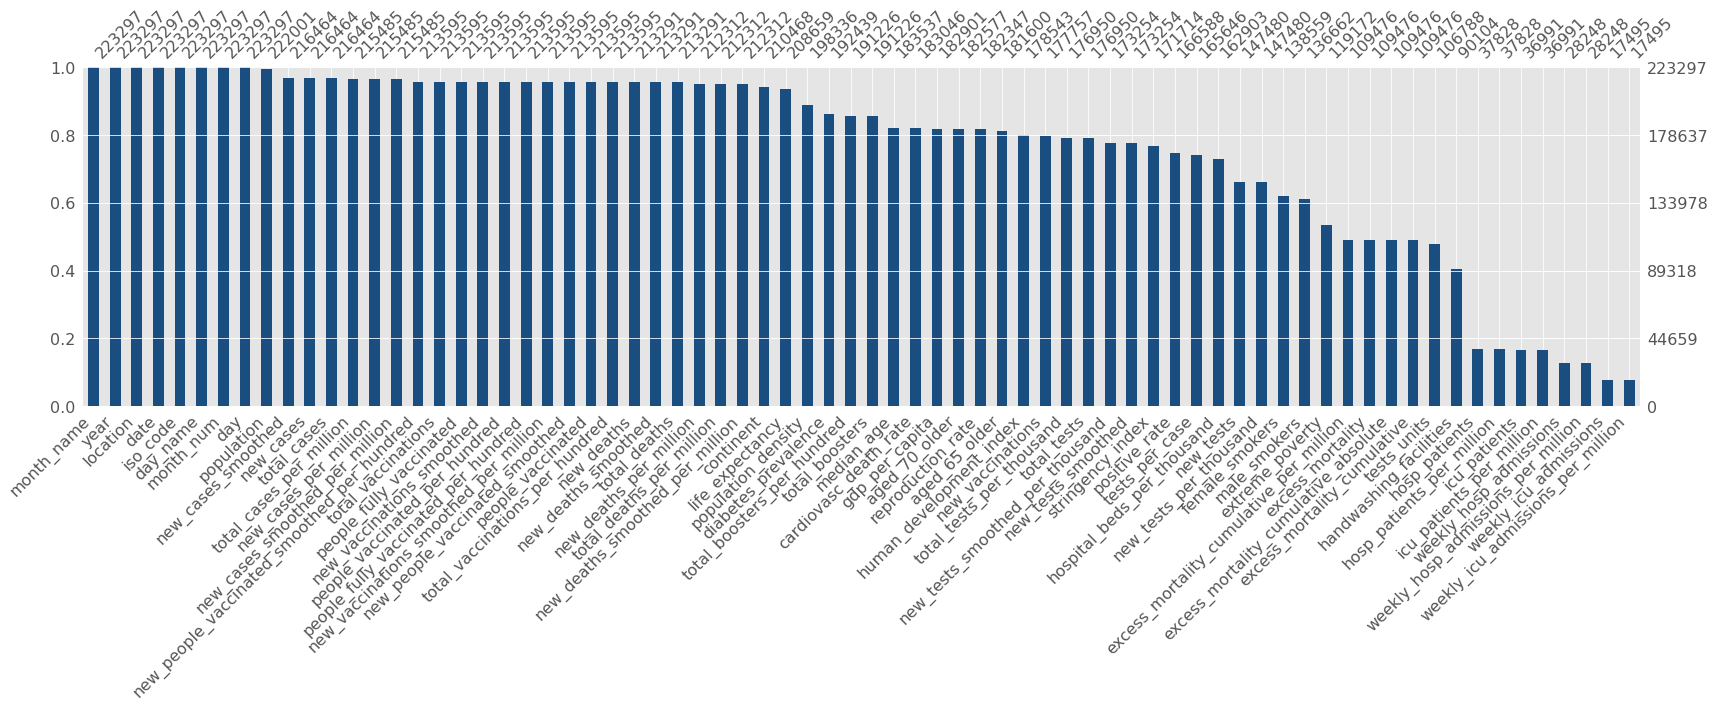

In [42]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [43]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.16464e+05  2.16464e+05         2.16464e+05   2.13291e+05   
mean   4.30669e+06  1.22904e+04         1.23191e+04   6.80051e+04   
std    2.70785e+07  8.51431e+04         8.30796e+04   3.62150e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.90400e+03  0.00000e+00         6.14300e+00   8.60000e+01   
50%    4.62215e+04  5.30000e+01         9.32860e+01   8.69000e+02   
75%    5.06950e+05  9.58000e+02         1.12757e+03   8.53800e+03   
max    6.23100e+08  4.08174e+06         3.43627e+06   6.56216e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  213291.00000         213291.00000             215485.00000   
mean      128.85874            129.40163              58715.05861   
std       703.24096            688.59465             104331.11361   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.03190               1019.09500   
50%         1.00000              1.28600               9983.36100   
75%        12.00000             13.85700              70693.39800   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           215485.00000                    215485.00000   
mean               192.47413                       192.91479   
std               1051.26941                       668.16419   
min                  0.00000                         0.00000   
25%                  0.00000                         1.37600   
50%                  8.02500                        19.93400   
75%                100.29900                       139.81900   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              212312.00000            212312.00000   
mean                  662.52786                 1.42945   
std                   942.47922                 4.91580   
min                     0.00000                 0.00000   
25%                    31.58000                 0.00000   
50%                   212.78600                 0.08567   
75%                   976.98348                 1.16400   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     212312.00000       182347.00000   36991.00000   
mean                           1.42593            0.93958     786.87987   
std                            3.23545            0.37334    2311.95818   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.76000      30.00000   
50%                            0.24200            0.96000     140.72280   
75%                            1.47025            1.13000     645.57609   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               36991.00000    37828.00000                37828.00000   
mean                   20.17354     4249.26365                  150.84805   
std                    24.06969    10385.20265                  177.75212   
min                     0.00000        0.00000                    0.00000   
25%                     4.79298      207.00000                   41.25275   
50%                    11.23000      925.00000                   85.42200   
75%                    30.36655     3510.25000                  198.01875   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            17495.00000                        17495.00000   
mean               273.30050                           11.92382   
std                454.48978                           11.80445   
min             

# Compute Pairwise Correlation

In [44]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.69894   
new_cases                                       0.69894    1.00000   
new_cases_smoothed                              0.72167    0.97232   
total_deaths                                    0.93604    0.71933   
new_deaths                                      0.46523    0.64526   
new_deaths_smoothed                             0.47996    0.63158   
total_cases_per_million                         0.09730    0.05605   
new_cases_per_million                           0.01371    0.06142   
new_cases_smoothed_per_million                  0.02212    0.07985   
total_deaths_per_million                        0.12045    0.07786   
new_deaths_per_million                         -0.00105    0.02991   
new_deaths_smoothed_per_million                -0.00070    0.03674   
reproduction_rate                               0.01296    0.03215   
icu_patients                                    0.42815    0.53323   
icu_patients_per_million                        0.01956    0.13619   
hosp_patients                                   0.52064    0.63141   
hosp_patients_per_million                       0.00397    0.10529   
weekly_icu_admissions                           0.28583    0.38253   
weekly_icu_admissions_per_million              -0.06406    0.08508   
weekly_hosp_admissions                          0.53871    0.63560   
weekly_hosp_admissions_per_million              0.07916    0.27958   
total_tests                                     0.17242    0.09727   
new_tests                                       0.56345    0.52158   
total_tests_per_thousand                        0.04844    0.04376   
new_tests_per_thousand                         -0.01079    0.03353   
new_tests_smoothed                              0.07694    0.07255   
new_tests_smoothed_per_thousand                 0.00908    0.05506   
positive_rate                                   0.03960    0.14589   
tests_per_case                                 -0.01411   -0.01071   
total_vaccinations                              0.73077    0.54538   
people_vaccinated                               0.70917    0.54200   
people_fully_vaccinated                         0.71173    0.53739   
total_boosters                                  0.70672    0.46574   
new_vaccinations                                0.44586    0.48436   
new_vaccinations_smoothed                       0.45873    0.48916   
total_vaccinations_per_hundred                  0.15690    0.10926   
people_vaccinated_per_hundred                   0.13866    0.09364   
people_fully_vaccinated_per_hundred             0.13346    0.09167   
total_boosters_per_hundred                      0.04620    0.01860   
new_vaccinations_smoothed_per_million          -0.01578    0.01164   
new_people_vaccinated_smoothed                  0.36958    0.38779   
new_people_vaccinated_smoothed_per_hundred     -0.03497   -0.02241   
stringency_index                               -0.08530    0.01332   
population                                      0.61251    0.54394   
population_density                             -0.01628   -0.01475   
median_age                                      0.03851    0.04451   
aged_65_older                                   0.03819    0.04575   
aged_70_older                                   0.03648    0.04521   
gdp_per_capita                                  0.01656    0.02056   
extreme_poverty                                -0.03628   -0.03521   
cardiovasc_death_rate                          -0.04156   -0.04538   
diabetes_prevalence                             0.00153   -0.00187   
female_smokers                                  0.00081    0.00533   
male_smokers                                   -0.00327    0.00092   
handwashing_facilities                          0.03224    0.03029   
hospital_beds_per_thousand                      0.00308    0.01664   
life_expectancy                                 0.0197

In [45]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93604
excess_mortality_cumulative_absolute          0.76503
total_vaccinations                            0.74773
people_vaccinated                             0.74319
new_cases_smoothed                            0.73924
people_fully_vaccinated                       0.72948
new_cases                                     0.71933
population                                    0.70835
weekly_hosp_admissions                        0.67010
new_deaths_smoothed                           0.64710
total_boosters                                0.64580
hosp_patients                                 0.63050
new_deaths                                    0.62805
new_vaccinations_smoothed                     0.60797
new_vaccinations                              0.59436
icu_patients                                  0.58765
new_tests                                     0.55586
new_people_vaccinated_smooth

<AxesSubplot:>

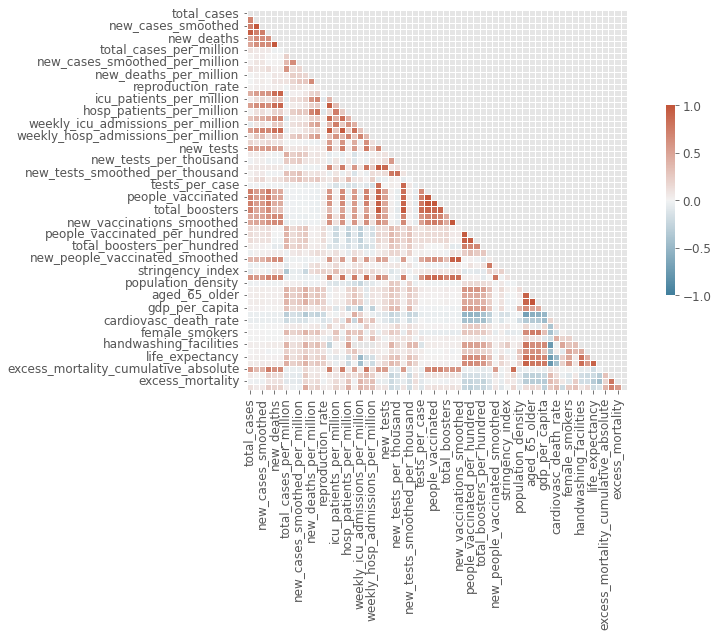

In [46]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Check Duplication

In [47]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [48]:
# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [49]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',\
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           209.77052                    0.125                  0.125   
1           209.77052                    0.125                  0.000   
2           209.77052                    0.125                  0.000   
3           209.77052                    0.125                  0.000   
4           209.77052                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                         5.23126  2020          2        Feb   24     Monday  
1                         5.23126  2020          2        Feb   25    Tuesday  
2                         5.23126  2020          2        Feb   26  Wednesday  
3                         5.23126  2020          2        Feb   27   Thursday  
4                         5.23126  2020          2        Feb   28     Friday

In [50]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.16464e+05  2.16464e+05         2.16464e+05             215485.00000   
mean   4.30669e+06  1.22904e+04         1.23191e+04              58715.05861   
std    2.70785e+07  8.51431e+04         8.30796e+04             104331.11361   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.90400e+03  0.00000e+00         6.14300e+00               1019.09500   
50%    4.62215e+04  5.30000e+01         9.32860e+01               9983.36100   
75%    5.06950e+05  9.58000e+02         1.12757e+03              70693.39800   
max    6.23100e+08  4.08174e+06         3.43627e+06             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  
count           215485.00000                    215485.00000  
mean               192.47413                       192.91479  
std               1051.26941                       668.16419  
min                  0.00000                         0.00000  
25%                  0.00000                         1.37600  
50%                  8.02500                        19.93400  
75%                100.29900                       139.81900  
max             195005.31300                     36401.60700

In [51]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         12829
location                              0
date                                  0
total_cases                        6833
new_cases                          6833
new_cases_smoothed                 6833
total_cases_per_million            7812
new_cases_per_million              7812
new_cases_smoothed_per_million     7812
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

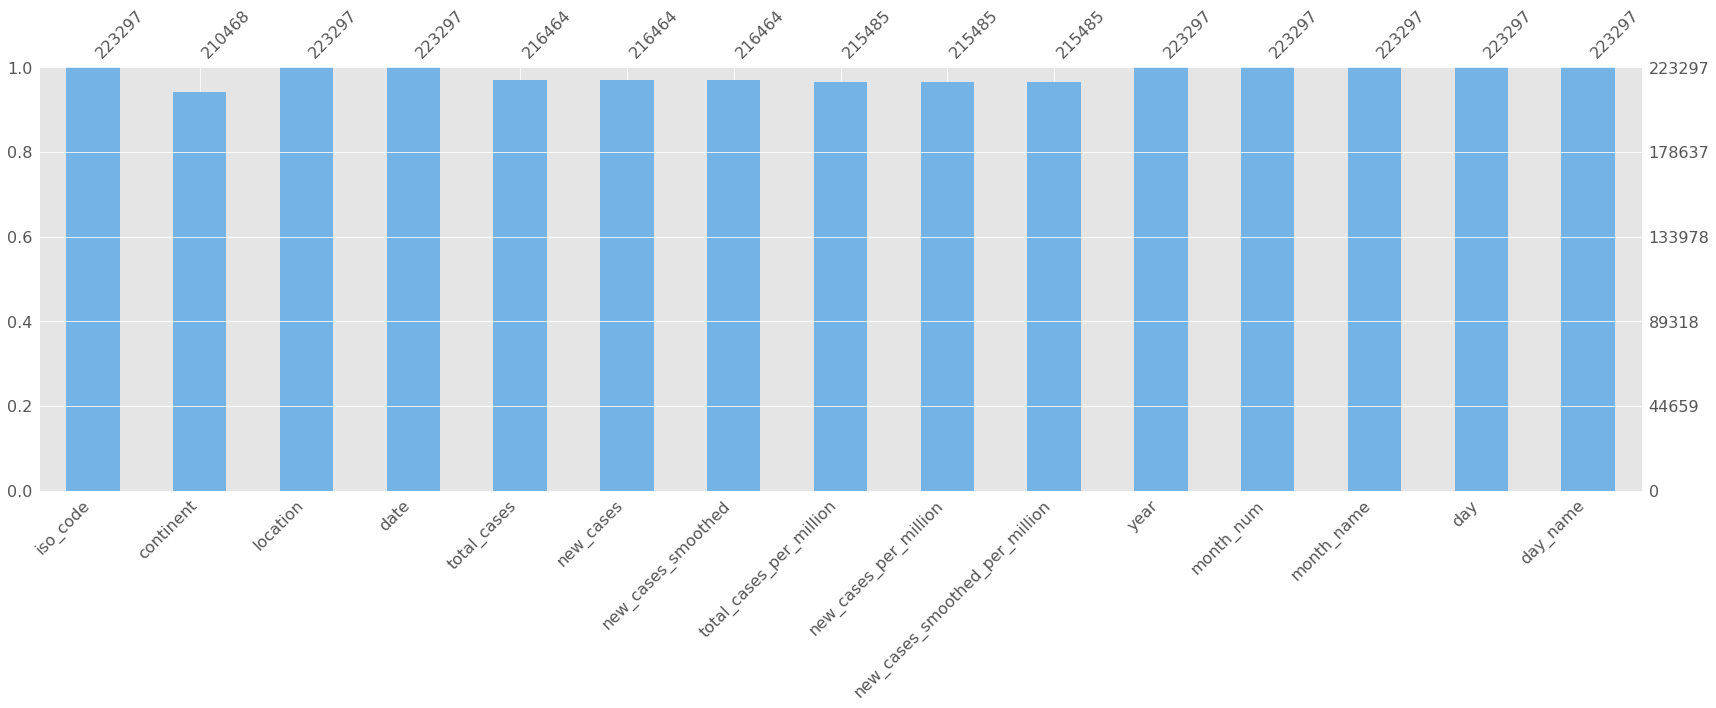

In [52]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

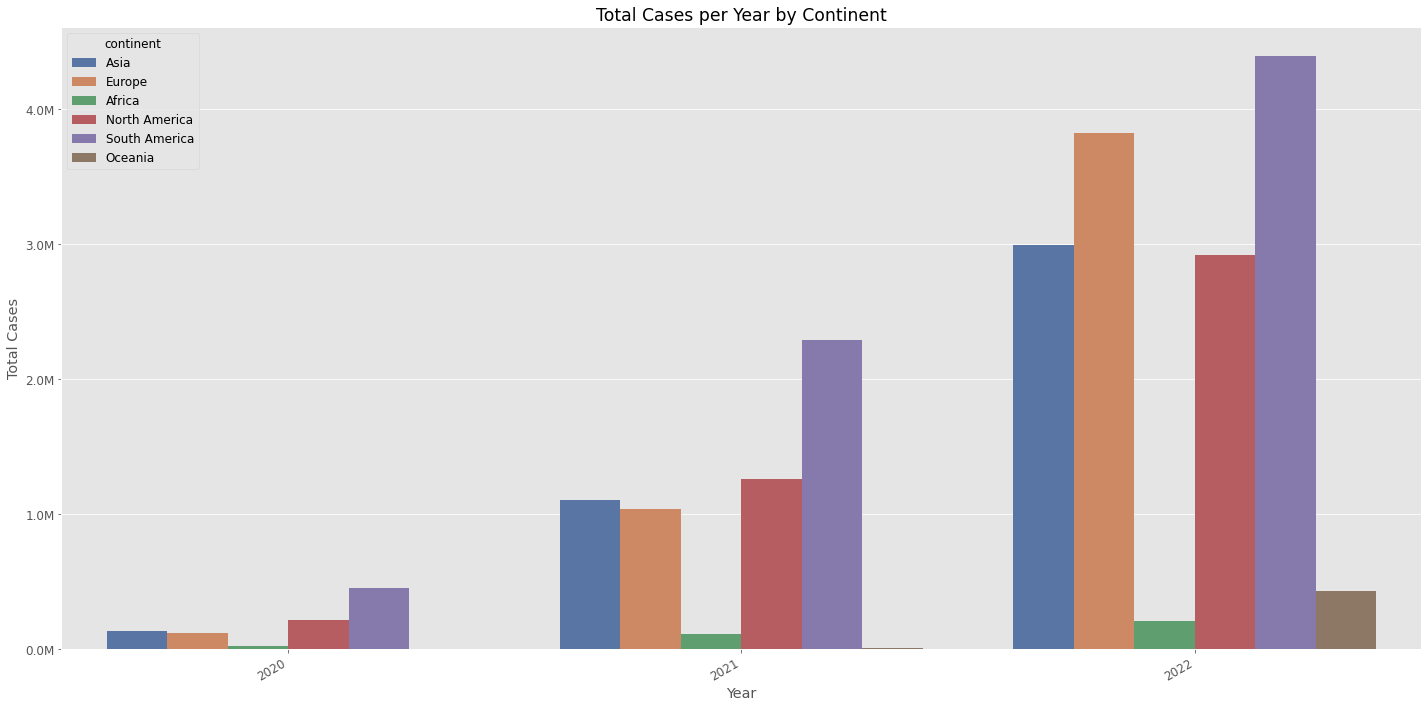

In [53]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', palette='deep',
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

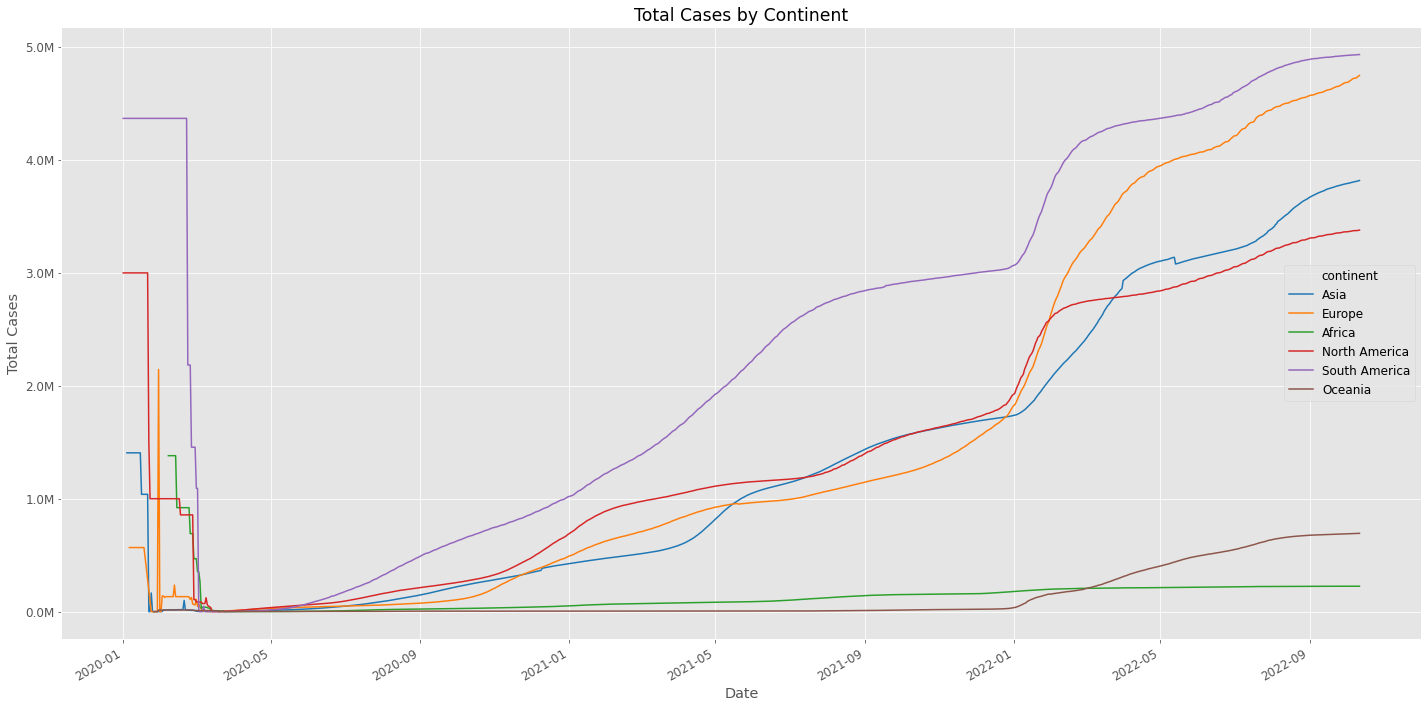

In [54]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

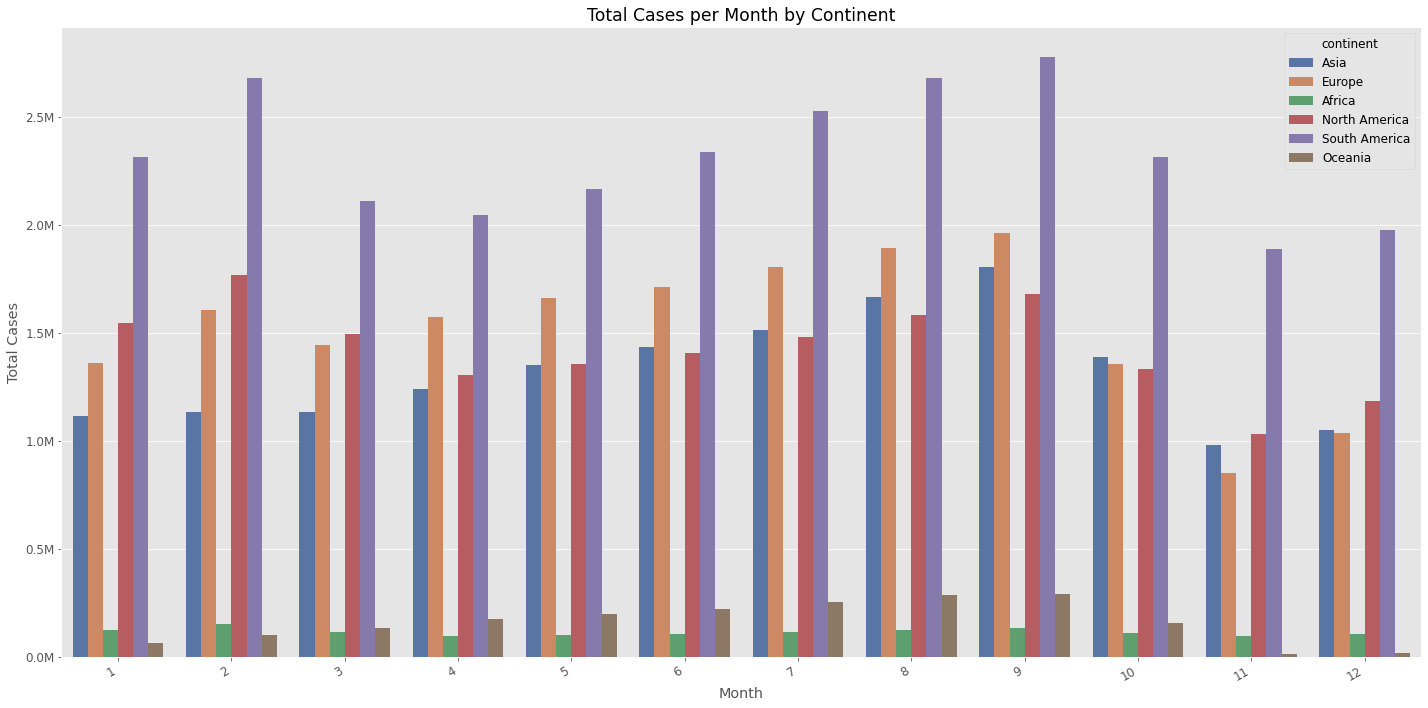

In [55]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='deep', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

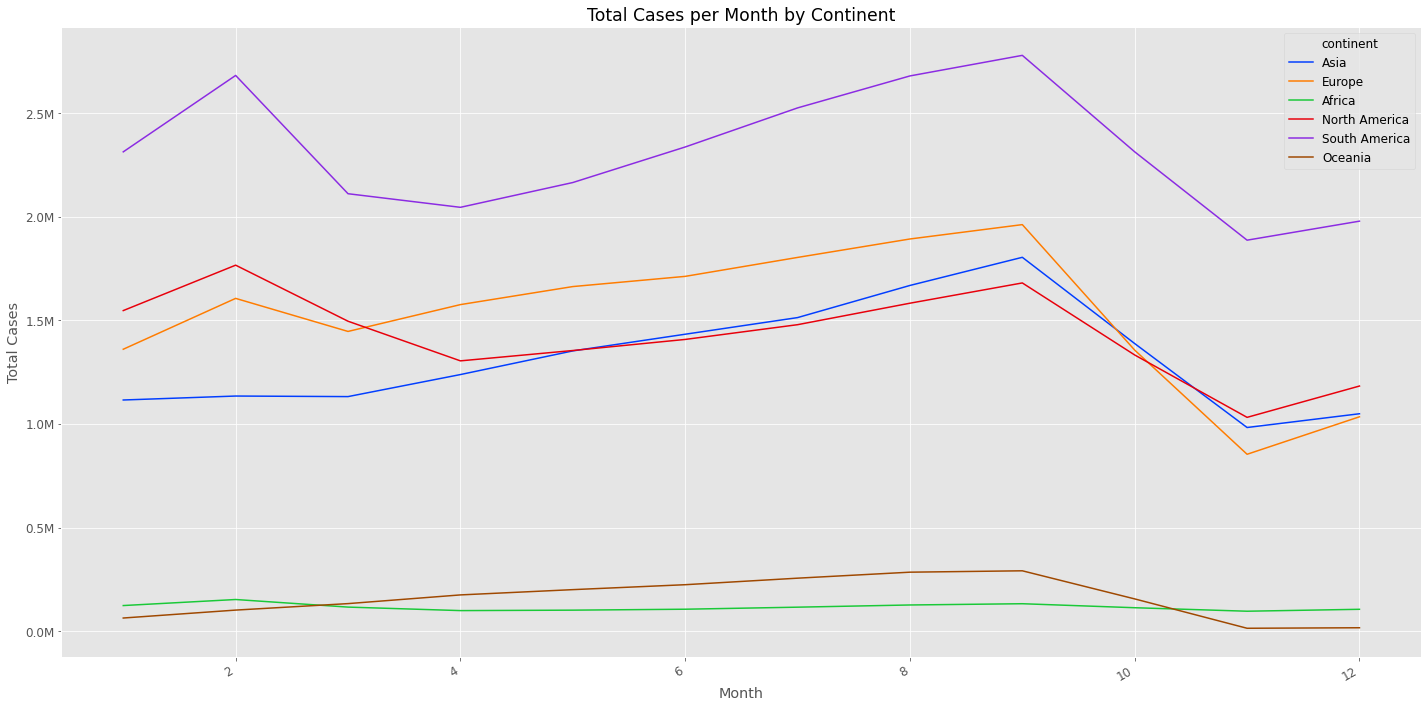

In [56]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='bright', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

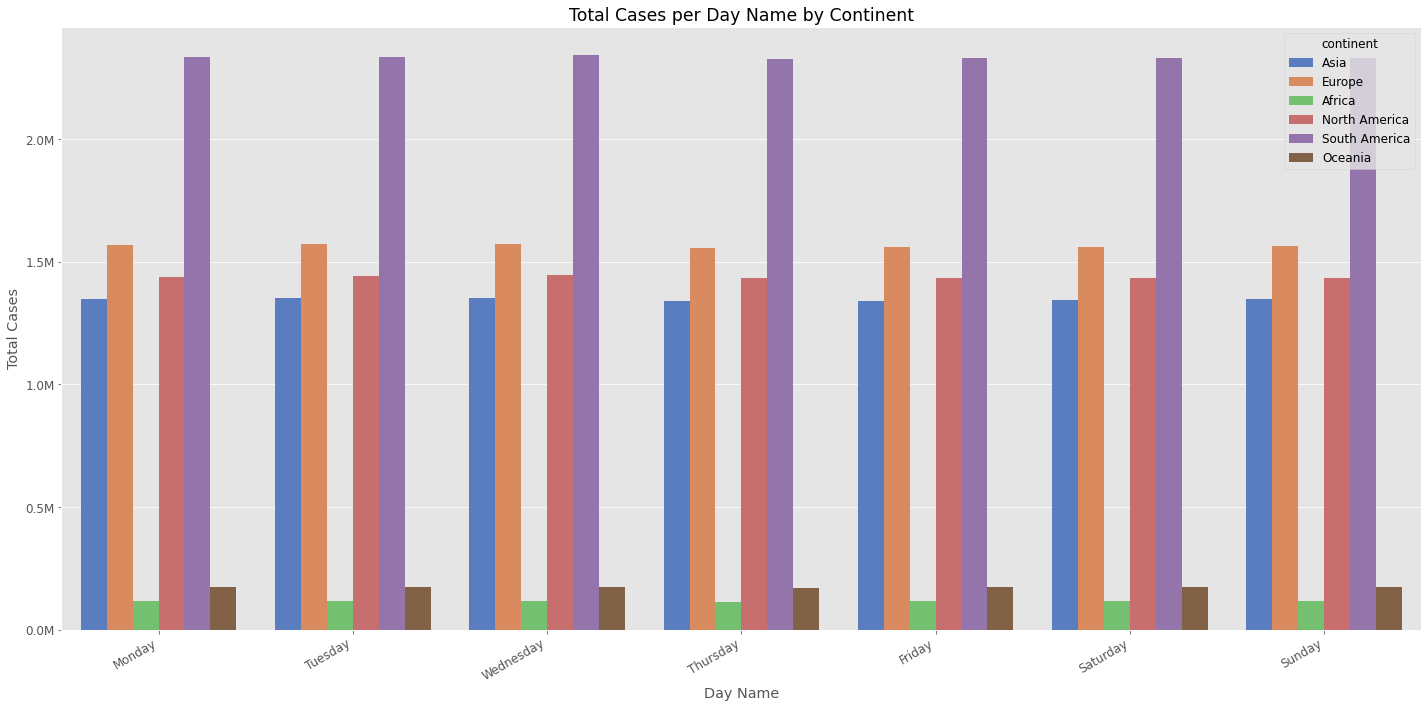

In [57]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', palette='muted',
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

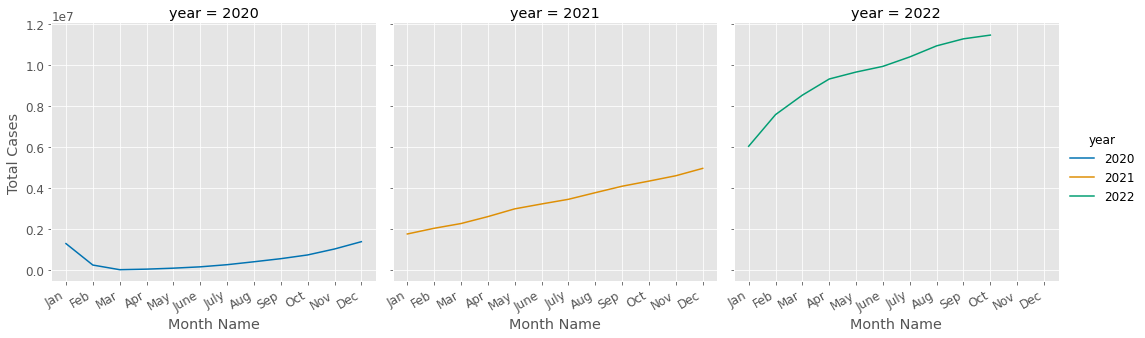

In [58]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='colorblind',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()
ax.yaxis.set_major_formatter(format_mill)

# Deaths Exploration

In [59]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4560.10064     8.35867   
1      AFG      Asia  Afghanistan 2020-02-25    4560.10064     8.35867   
2      AFG      Asia  Afghanistan 2020-02-26    4560.10064     8.35867   
3      AFG      Asia  Afghanistan 2020-02-27    4560.10064     8.35867   
4      AFG      Asia  Afghanistan 2020-02-28    4560.10064     8.35867   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              8.40104                 113.71976                 0.20851   
1              8.40104                 113.71976                 0.20851   
2              8.40104                 113.71976                 0.20851   
3              8.40104                 113.71976                 0.20851   
4              8.40104                 113.71976                 0.20851   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.20955  2020          2        Feb   24     Monday  
1                          0.20955  2020          2        Feb   25    Tuesday  
2                          0.20955  2020          2        Feb   26  Wednesday  
3                          0.20955  2020          2        Feb   27   Thursday  
4                          0.20955  2020          2        Feb   28     Friday

In [60]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   2.13291e+05  213291.00000         213291.00000   
mean    6.80051e+04     128.85874            129.40163   
std     3.62150e+05     703.24096            688.59465   
min     1.00000e+00       0.00000              0.00000   
25%     8.60000e+01       0.00000              0.03190   
50%     8.69000e+02       1.00000              1.28600   
75%     8.53800e+03      12.00000             13.85700   
max     6.56216e+06   17737.00000          14858.28600   

       total_deaths_per_million  new_deaths_per_million  \
count              212312.00000            212312.00000   
mean                  662.52786                 1.42945   
std                   942.47922                 4.91580   
min                     0.00000                 0.00000   
25%                    31.58000                 0.00000   
50%                   212.78600                 0.08567   
75%                   976.98348                 1.16400   
max                  6431.17200               553.80300   

       new_deaths_smoothed_per_million  
count                     212312.00000  
mean                           1.42593  
std                            3.23545  
min                            0.00000  
25%                            0.00600  
50%                            0.24200  
75%                            1.47025  
max                          148.67300

In [61]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          12829
location                               0
date                                   0
total_deaths                       10006
new_deaths                         10006
new_deaths_smoothed                10006
total_deaths_per_million           10985
new_deaths_per_million             10985
new_deaths_smoothed_per_million    10985
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

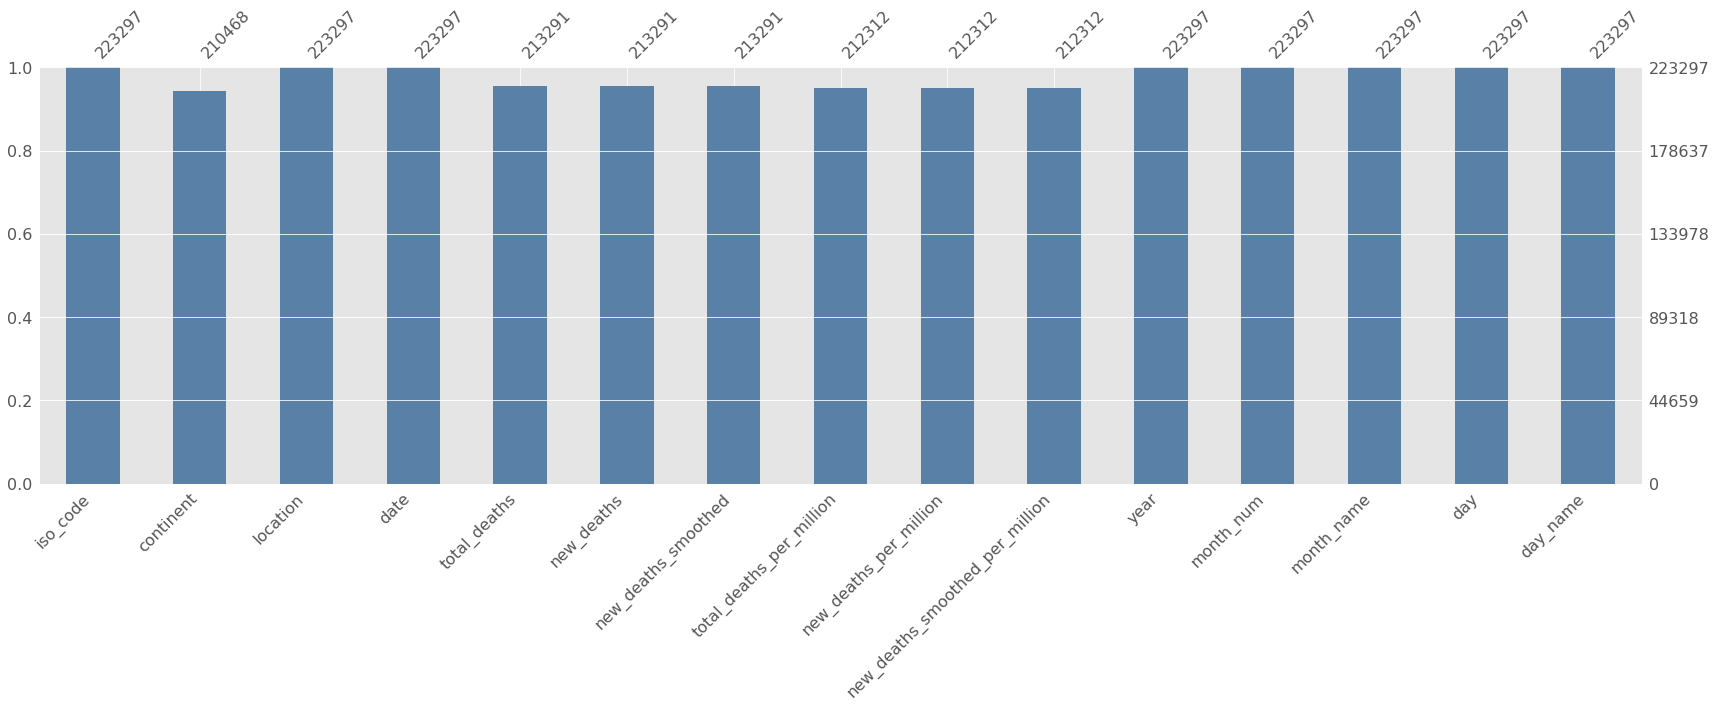

In [62]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

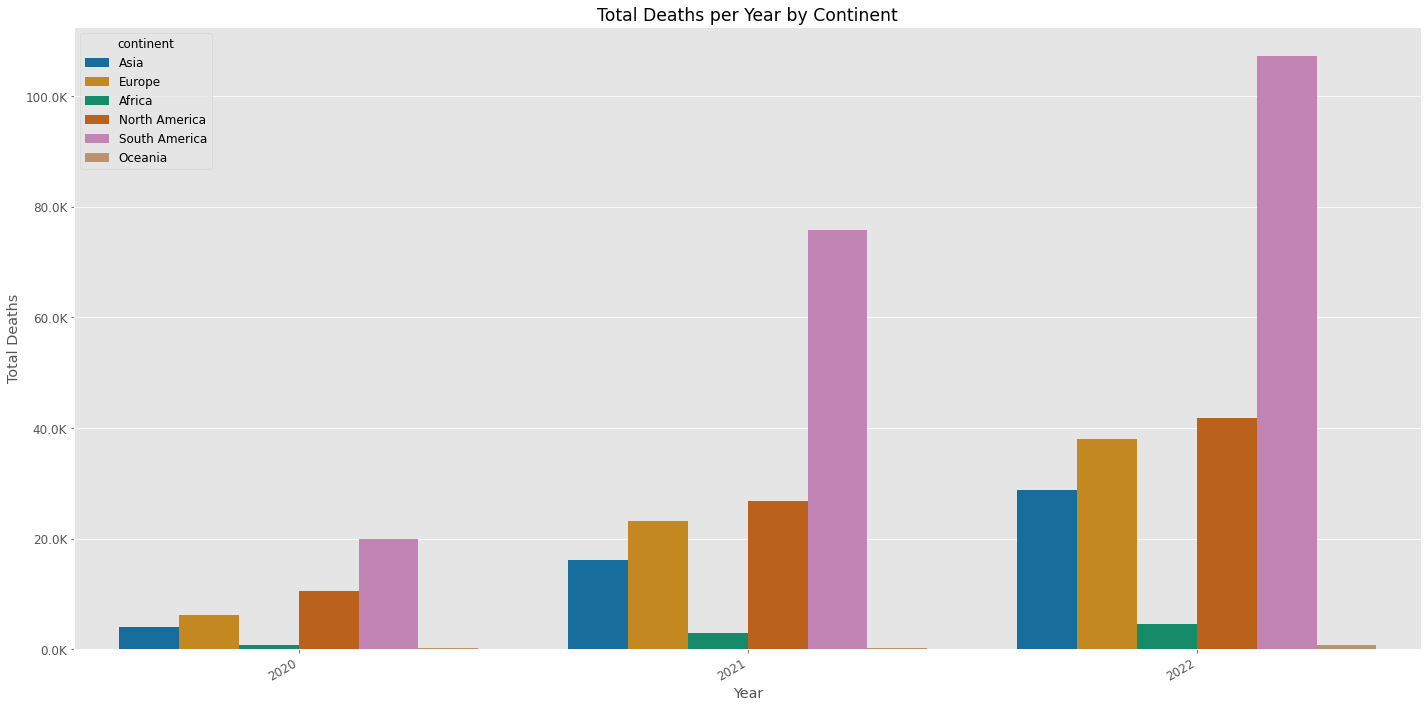

In [63]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', palette='colorblind', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

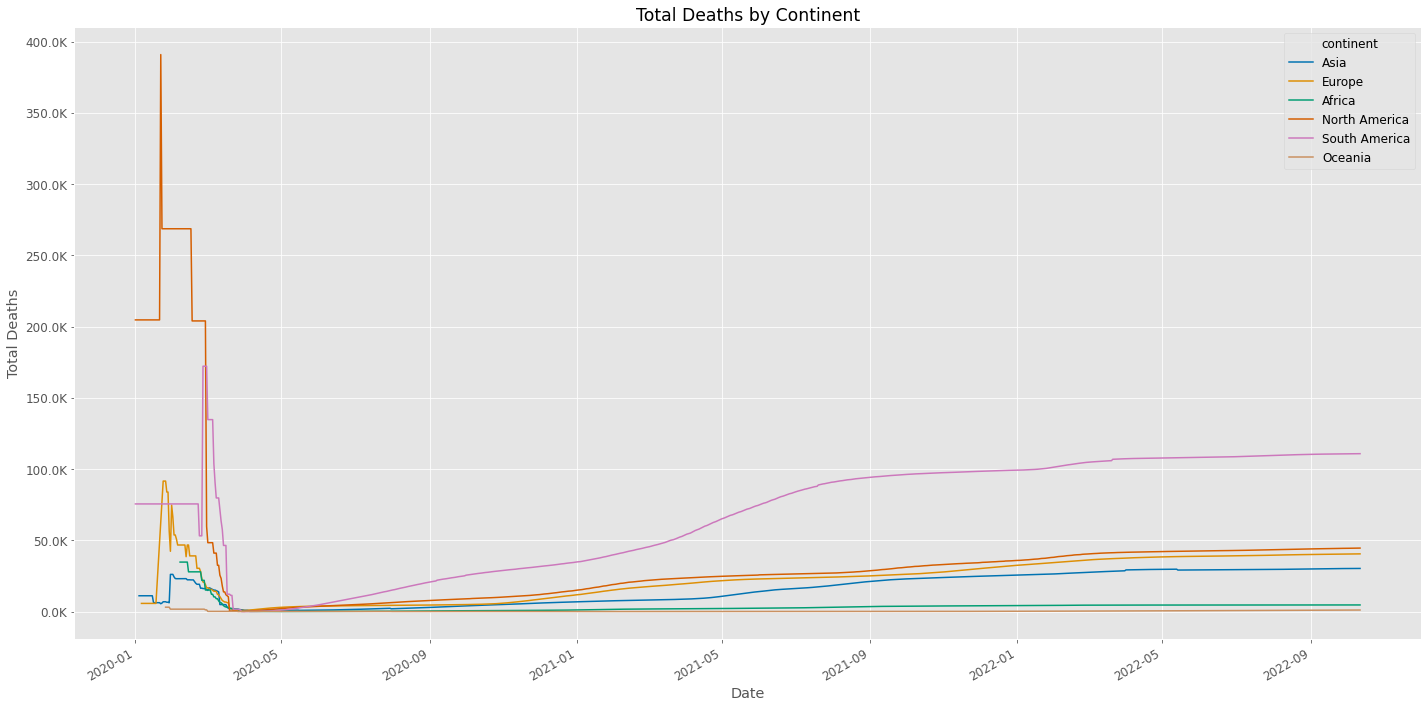

In [64]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', palette='colorblind',
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

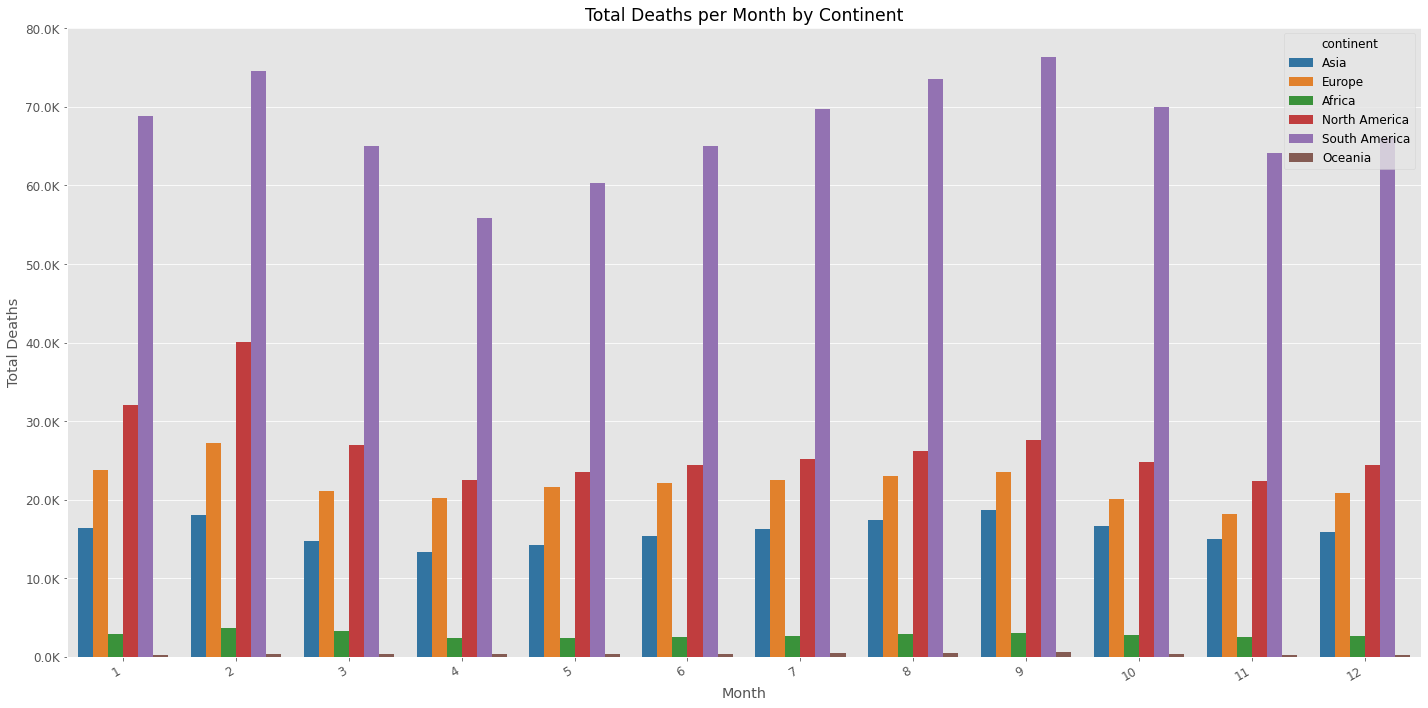

In [65]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='tab10', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

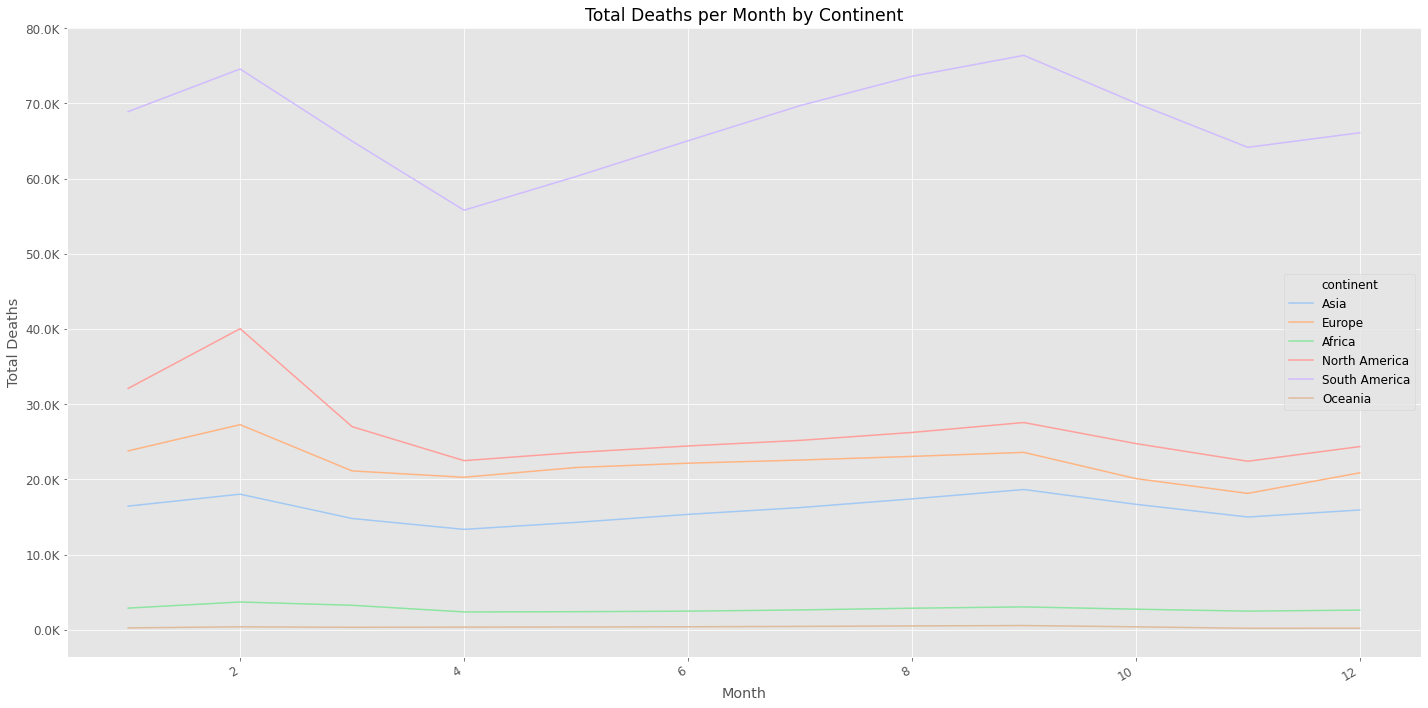

In [66]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='pastel',
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

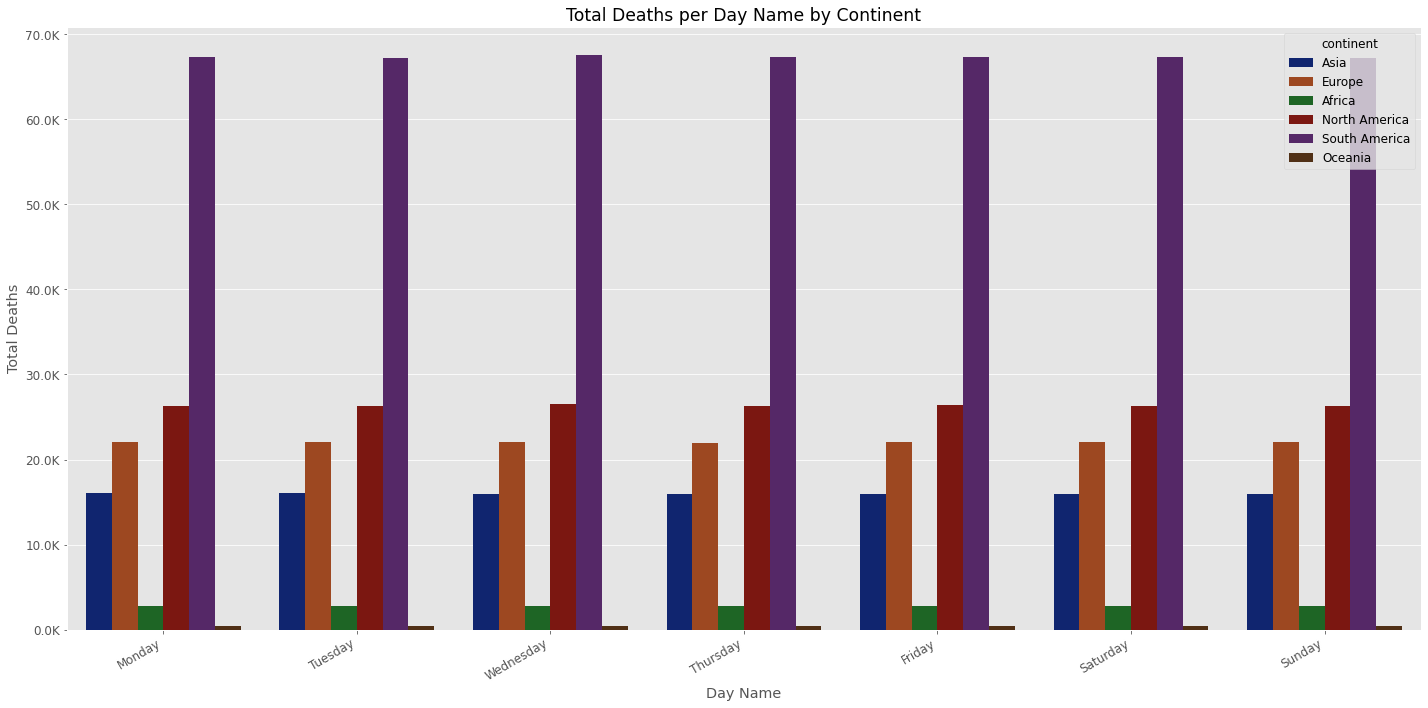

In [67]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', palette='dark',
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

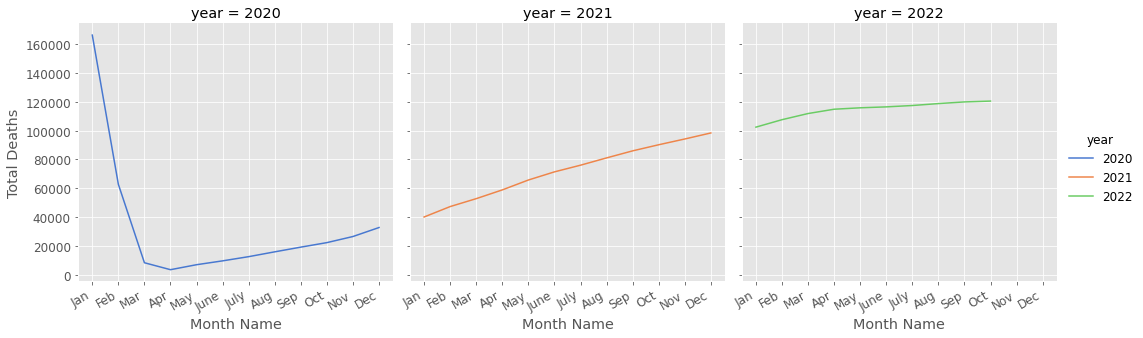

In [68]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='muted',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [69]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02468        0.13004         19.5295         NaN   
1                          0.02468        0.13004         19.5295         NaN   
2                          0.02468        0.13004         19.5295         NaN   
3                          0.02468        0.13004         19.5295         NaN   
4                          0.02468        0.13004         19.5295         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [70]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.47480e+05  1.76950e+05              176950.00000   
mean   4.74564e+04  3.06669e+07                 851.19855   
std    1.90188e+05  2.42191e+08                2174.54030   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    1.01711e+03  2.00292e+05                  36.73350   
50%    4.92050e+03  9.32307e+05                 187.04700   
75%    2.34685e+04  5.49781e+06                 741.00800   
max    3.58556e+07  9.21400e+09               32925.82600   

       new_tests_per_thousand  new_tests_smoothed  \
count            147480.00000         1.73254e+05   
mean                  3.63315         1.22554e+05   
std                   9.07481         1.07991e+06   
min                   0.00000         0.00000e+00   
25%                   0.27900         6.39000e+02   
50%                   0.95900         3.50200e+03   
75%                   3.03500         2.22200e+04   
max                 531.06200         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     173254.00000   166588.00000     1.65646e+05  
mean                           2.92303        0.09442     2.17320e+03  
std                            7.12055        0.10270     2.94364e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15839        0.01964     1.06000e+01  
50%                            0.78800        0.06600     2.85000e+01  
75%                            2.66100        0.12900     8.34000e+01  
max                          147.60300        1.00000     1.02363e+06

In [71]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           12829
location                                0
date                                    0
new_tests                           75817
total_tests                         46347
total_tests_per_thousand            46347
new_tests_per_thousand              75817
new_tests_smoothed                  50043
new_tests_smoothed_per_thousand     50043
positive_rate                       56709
tests_per_case                      57651
tests_units                        116509
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

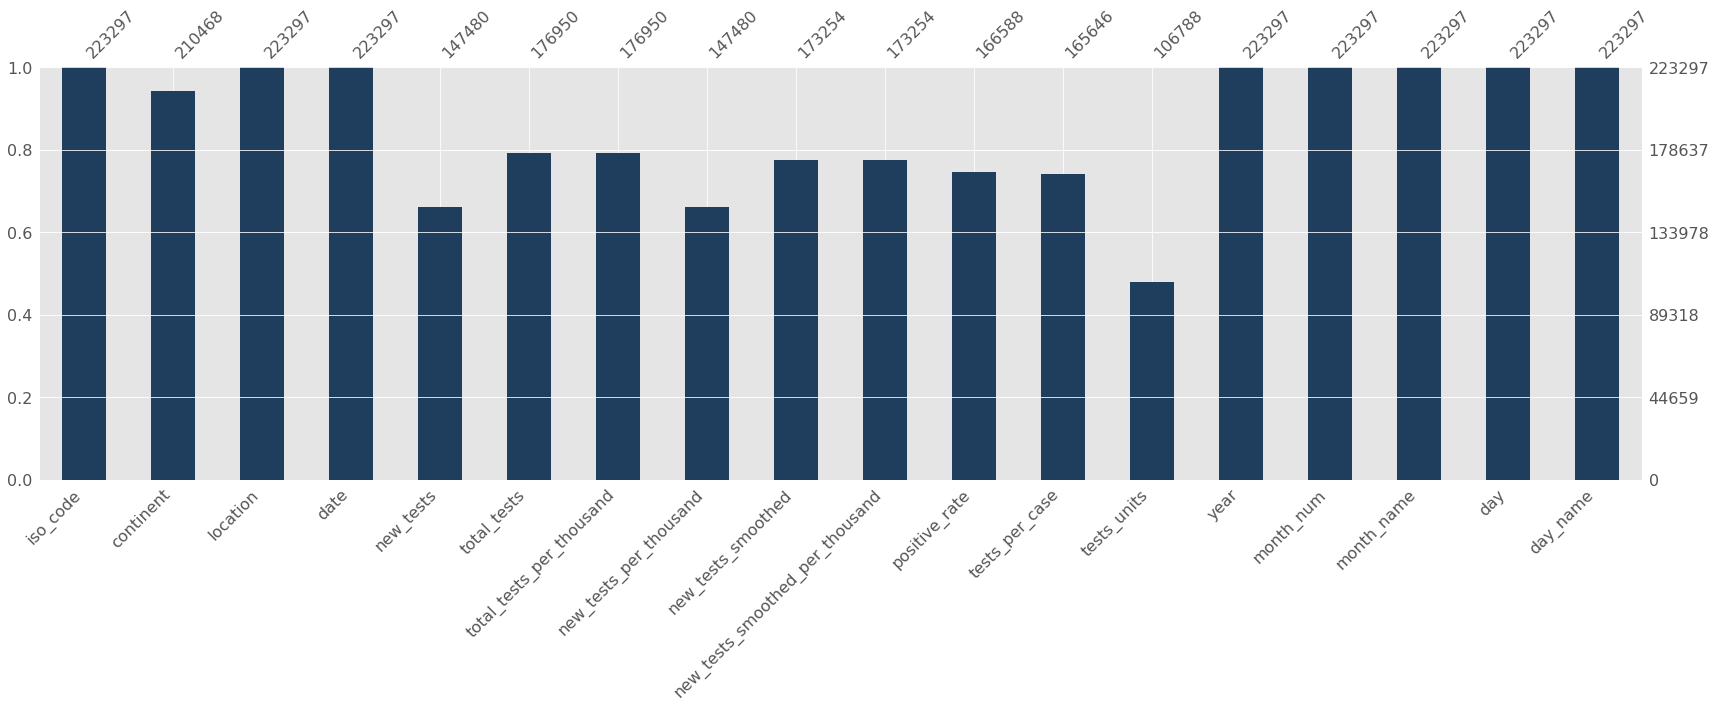

In [72]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

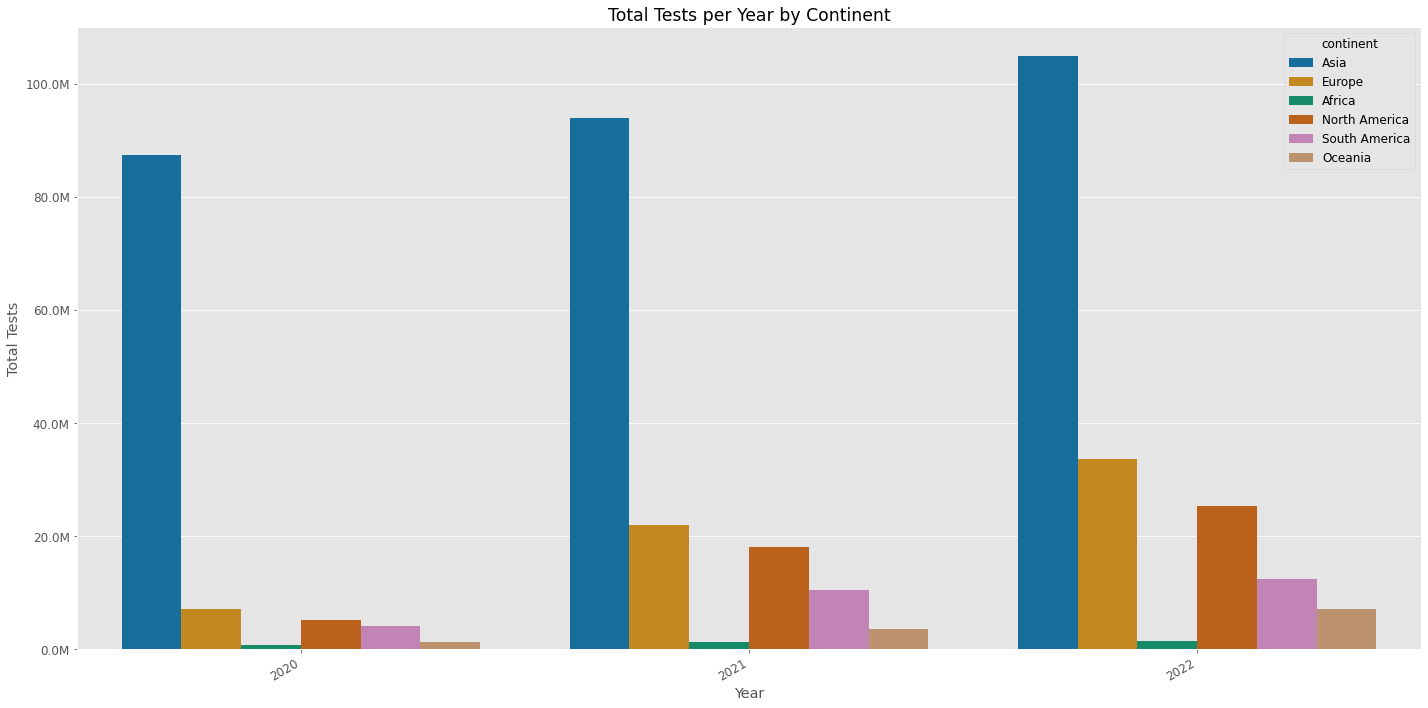

In [73]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', palette='colorblind',
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

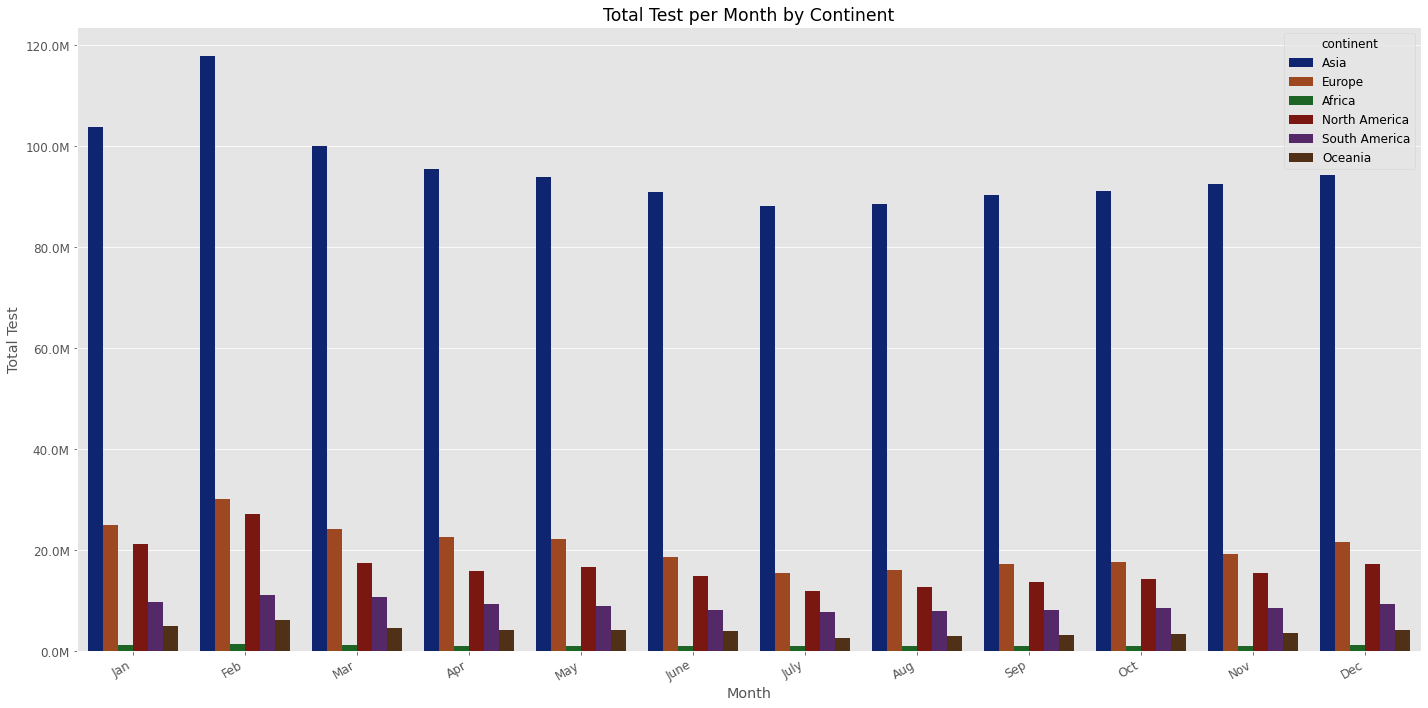

In [74]:
plot_bar(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', palette='dark', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

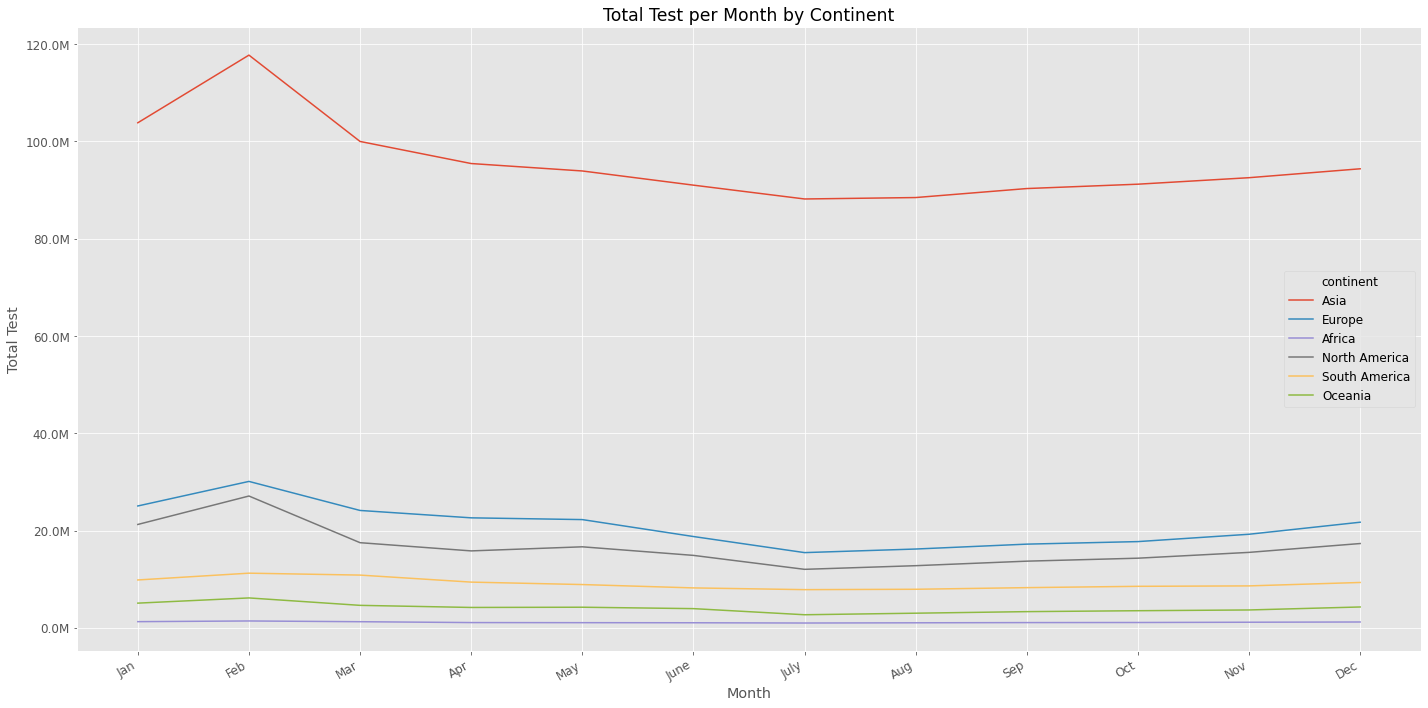

In [75]:
plot_line(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

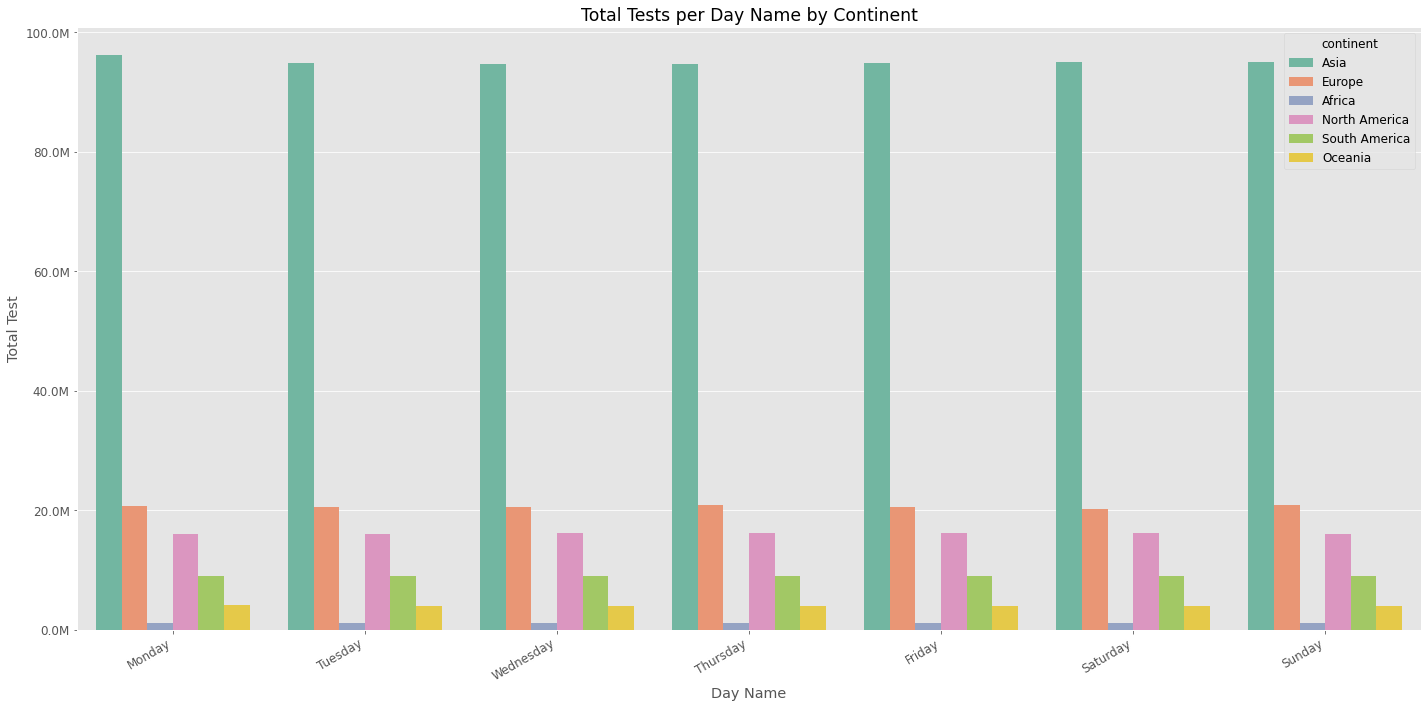

In [76]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', palette='Set2',
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

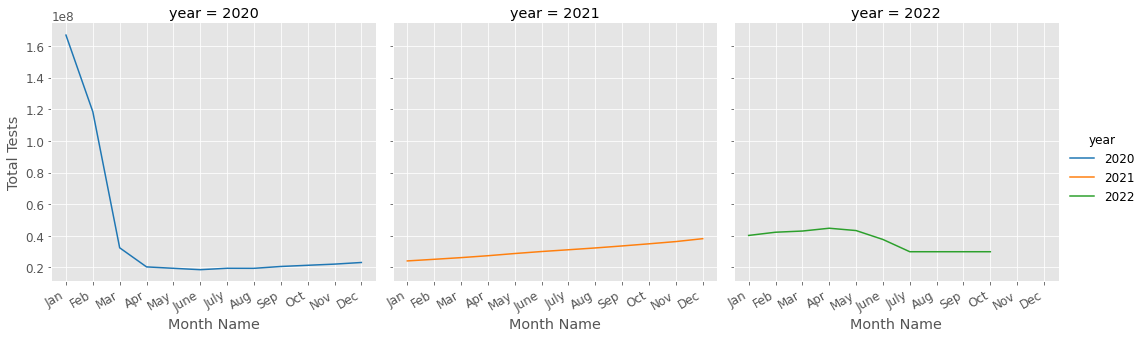

In [77]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [78]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         4.80752e+06   
1      AFG      Asia  Afghanistan 2020-02-25         4.80752e+06   
2      AFG      Asia  Afghanistan 2020-02-26         4.80752e+06   
3      AFG      Asia  Afghanistan 2020-02-27         4.80752e+06   
4      AFG      Asia  Afghanistan 2020-02-28         4.80752e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        4.39843e+06              4.24770e+06             NaN   
1        4.39843e+06              4.24770e+06             NaN   
2        4.39843e+06              4.24770e+06             NaN   
3        4.39843e+06              4.24770e+06             NaN   
4        4.39843e+06              4.24770e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0            4714.4                 20214.6944   
1            4714.4                 20214.6944   
2            4714.4                 20214.6944   
3            4714.4                 20214.6944   
4            4714.4                 20214.6944   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                        11.98908                       10.96875   
1                        11.98908                       10.96875   
2                        11.98908                       10.96875   
3                        11.98908                       10.96875   
4                        11.98908                       10.96875   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                             10.59292                         NaN   
1                             10.59292                         NaN   
2                             10.59292                         NaN   
3                             10.59292                         NaN   
4                             10.59292                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              504.17487                     18590.26486   
1                              504.17487                     18590.26486   
2                              504.17487                     18590.26486   
3                              504.17487                     18590.26486   
4                              504.17487                     18590.26486   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.04641  2020          2        Feb   
1                                     0.04641  2020          2        Feb   
2                                     0.04641  2020          2        Feb   
3                                     0.04641  2020          2        Feb   
4                                     0.04641  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [79]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         2.13595e+05        2.13595e+05              2.13595e+05   
mean          1.31845e+08        6.35806e+07              5.43230e+07   
std           7.44418e+08        3.45832e+08              3.01454e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.65793e+05        2.19717e+05              1.81499e+05   
50%           2.46555e+06        1.45212e+06              1.22309e+06   
75%           1.46747e+07        7.73370e+06              6.76752e+06   
max           1.27987e+10        5.39245e+09              4.96499e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.91226e+05       1.77757e+05                2.13595e+05   
mean      2.21753e+07       4.56733e+05                3.69405e+05   
std       1.21118e+08       2.32556e+06                2.09706e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.97721e+04       2.76908e+03                9.28000e+02   
50%       4.88709e+05       1.51907e+04                7.87300e+03   
75%       4.31052e+06       8.86289e+04                5.27557e+04   
max       2.55848e+09       4.96752e+07                4.36898e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    213595.00000                   213595.00000   
mean                         78.67431                       38.80043   
std                          60.90035                       25.22433   
min                           0.00000                        0.00000   
25%                          24.63671                       16.28644   
50%                          72.39799                       39.48506   
75%                         117.01575                       57.42219   
max                         374.39000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         213595.00000                191226.00000   
mean                              34.18828                    20.38915   
std                               23.61695                    20.38654   
min                                0.00000                     0.00000   
25%                               12.85400                     2.63706   
50%                               32.88250                    13.68000   
75%                               51.08000                    33.01044   
max                              126.79000                   139.77000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           213595.00000                     2.13595e+05   
mean                              2605.59562                     1.40519e+05   
std                               3204.60833                     8.34626e+05   
min                                  0.00000                     0.00000e+00   
25%                                573.00000                     3.01000e+02   
50%                               1835.06969                     3.32637e+03   
75%                               3424.66944                     2.07345e+04   
max                             117862.00000                     2.10705e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                213595.00000  
mean                                      0.11260  
std                                       0.18495  
min                                       0.00000  
25%                                       0.01900  
50%                                       0.07500  
75%                                       0.13162  
max                                      11.78600

In [80]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     12829
location                                          0
date                                              0
total_vaccinations                             9702
people_vaccinated                              9702
people_fully_vaccinated                        9702
total_boosters                                32071
new_vaccinations                              45540
new_vaccinations_smoothed                      9702
total_vaccinations_per_hundred                 9702
people_vaccinated_per_hundred                  9702
people_fully_vaccinated_per_hundred            9702
total_boosters_per_hundred                    32071
new_vaccinations_smoothed_per_million          9702
new_people_vaccinated_smoothed                 9702
new_people_vaccinated_smoothed_per_hundred     9702
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

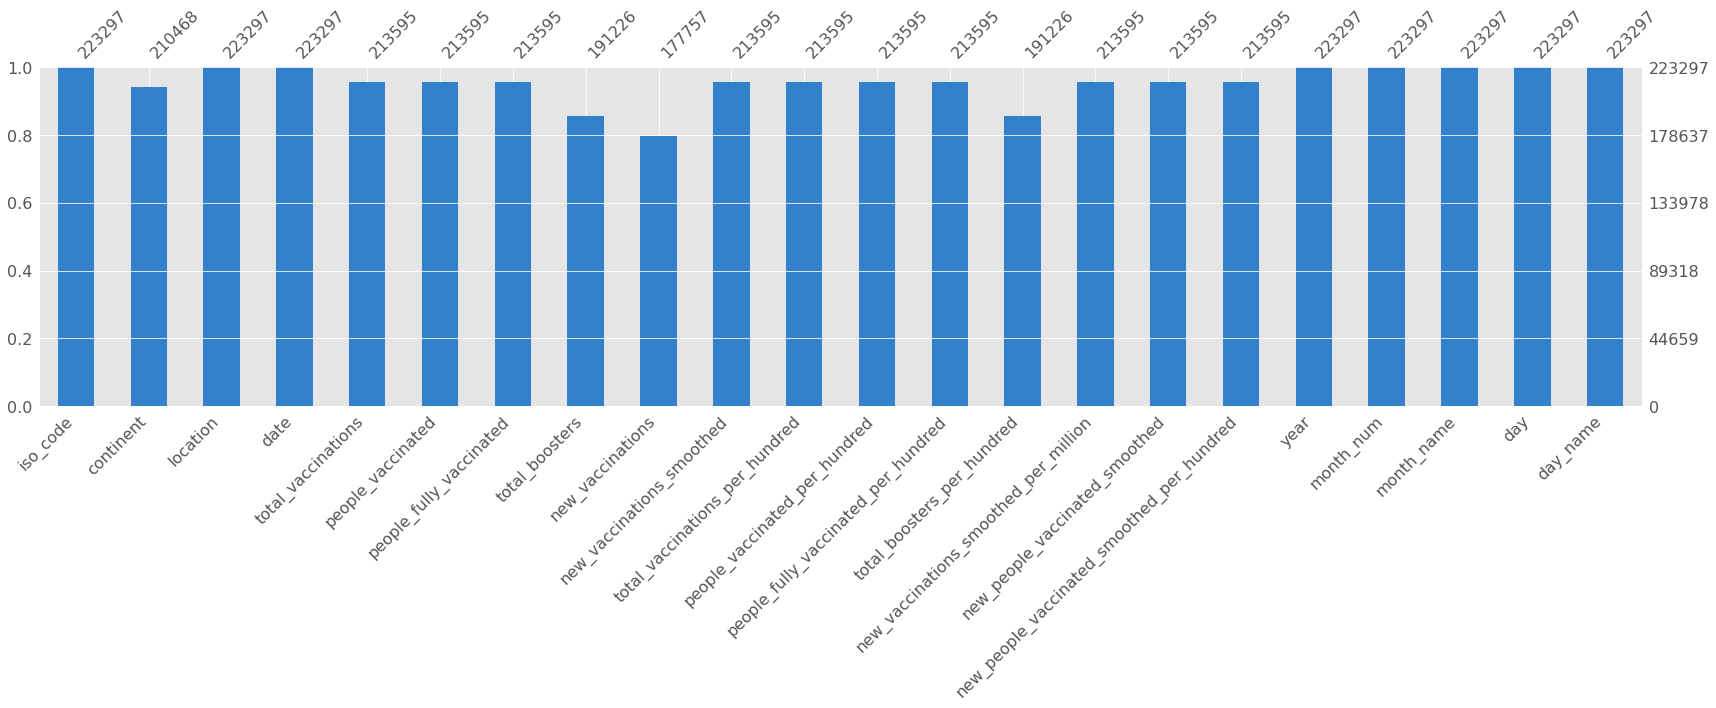

In [81]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

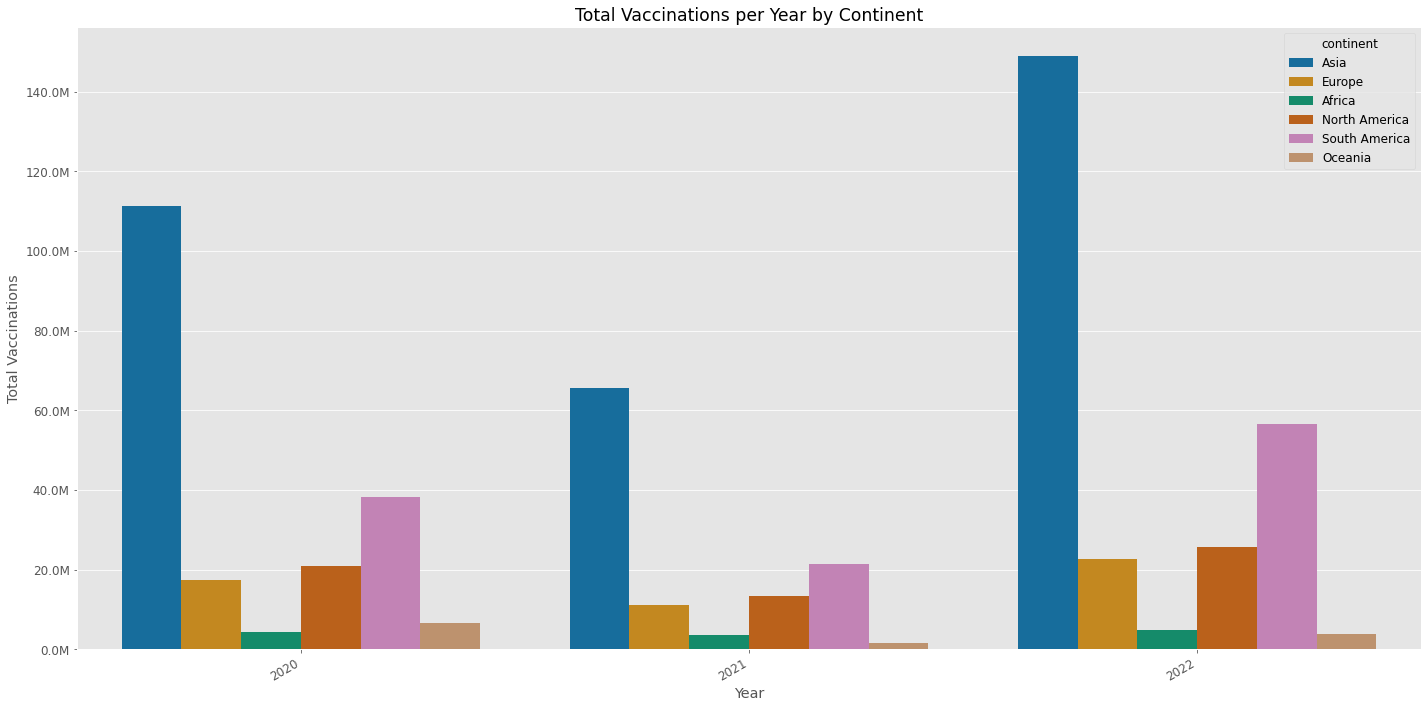

In [82]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', palette='colorblind', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

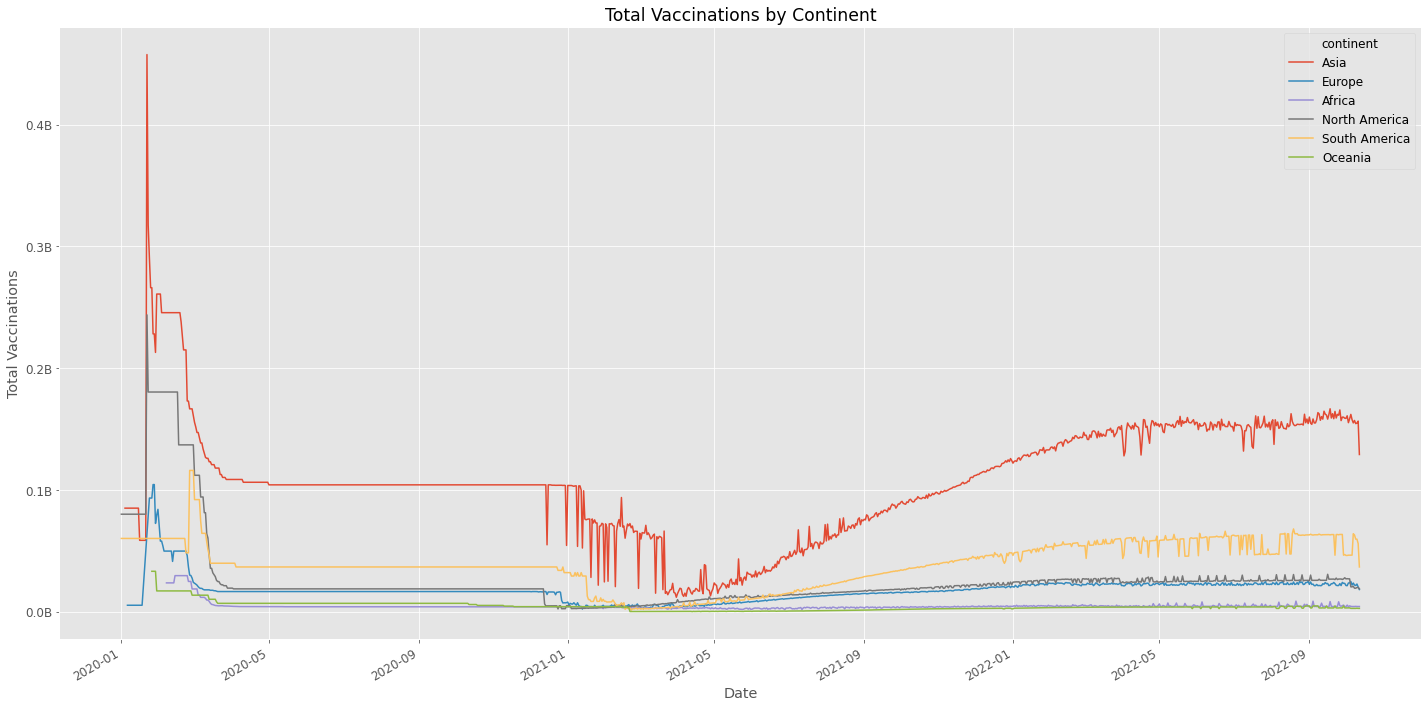

In [83]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

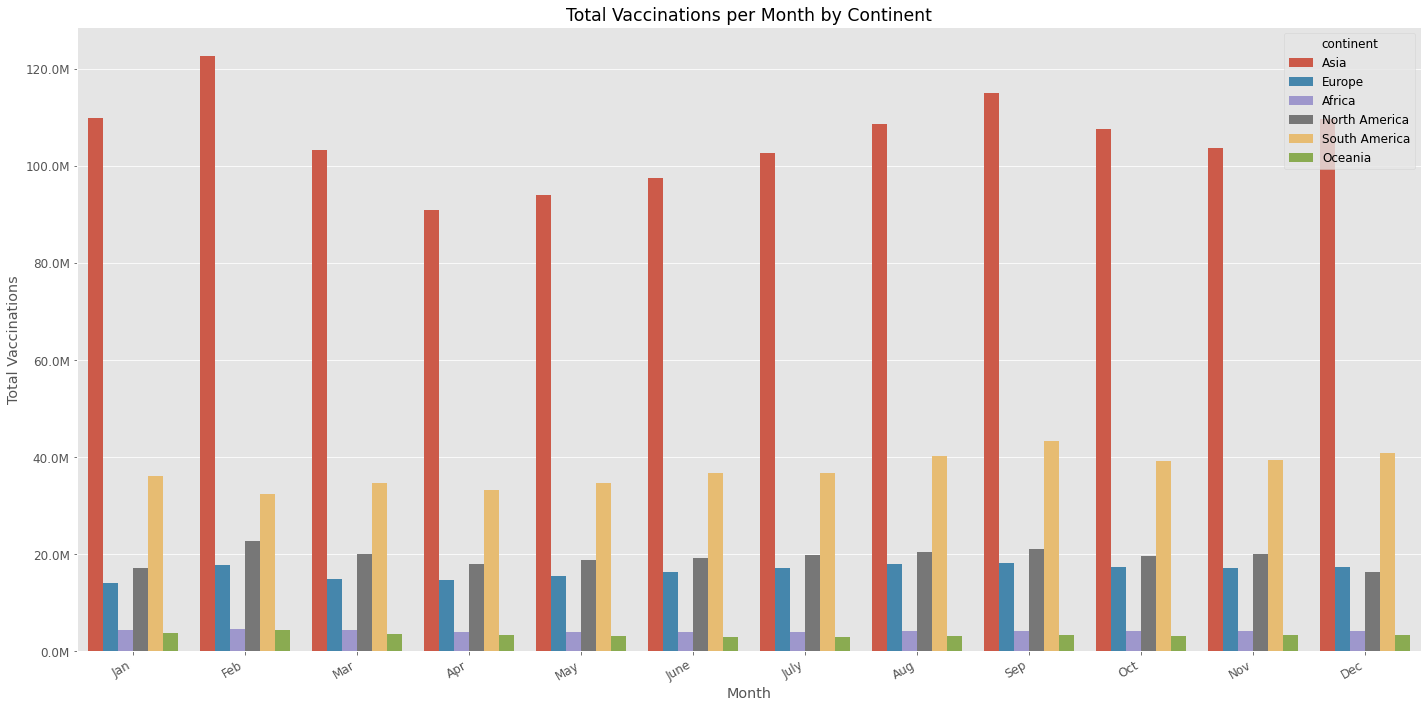

In [84]:
plot_bar(
    data=df_vacc,
    x='month_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

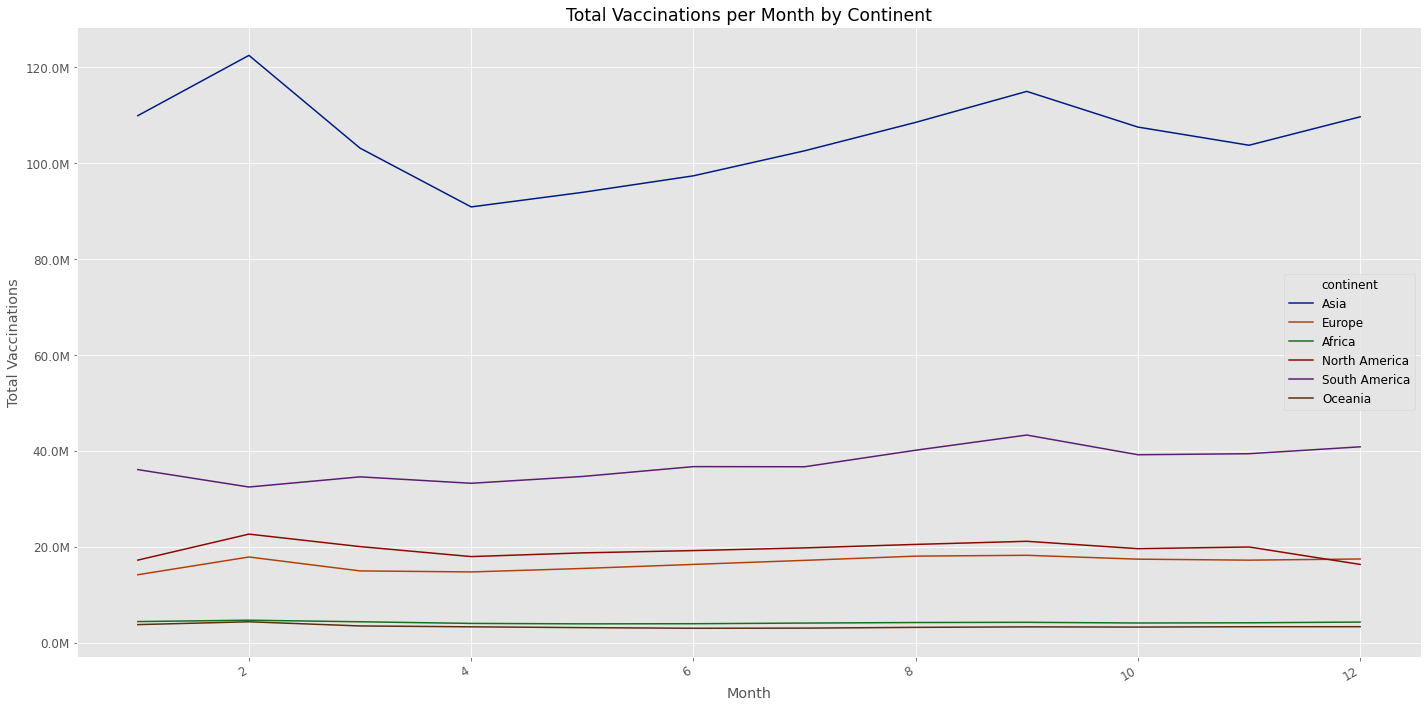

In [85]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', palette='dark', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

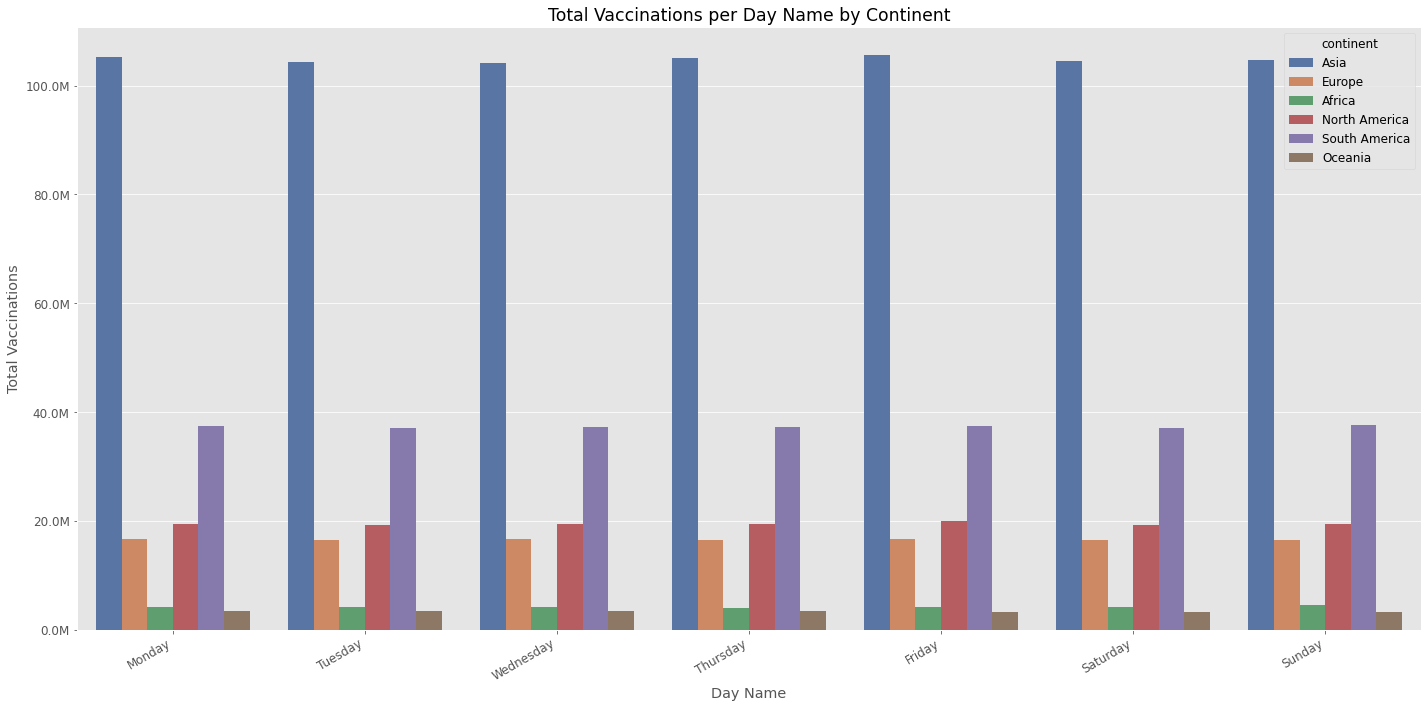

In [86]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', palette='deep', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

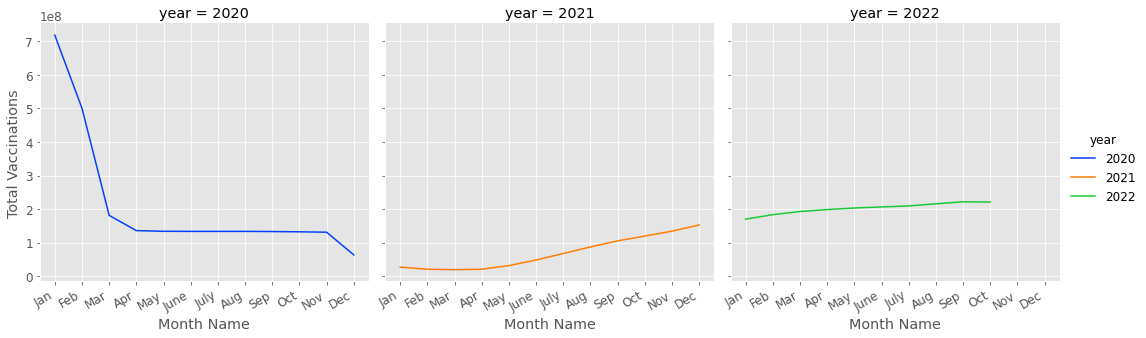

In [87]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [88]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [89]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.22001e+05        198336.00000  183537.00000   181600.00000   
mean   1.42304e+08           456.45240      30.61603        8.80342   
std    6.93834e+08          2105.23609       9.06226        6.12644   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.21626e+05            37.31200      22.30000        3.52600   
50%    7.42506e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   182577.00000    182901.00000     119172.00000           183046.00000   
mean         5.55336     19551.58668         13.63287              261.42443   
std          4.16193     20537.88328         20.03140              120.22387   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.03200     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.40000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         192439.00000    138559.00000  136662.00000   
mean               8.38580        10.67503      32.80912   
std                4.73215        10.62541      13.53448   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             90104.00000                162903.00000     208659.00000   
mean                 50.93279                     3.08915         73.61948   
std                  31.88303                     2.55246          7.44622   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  83.24100                     4.20000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             178543.00000                           1.09476e+05   
mean                   0.72482                           3.52922e+04   
std                    0.14961                           9.92328e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           8.61182e+01   
50%                    0.74200                           5.90657e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.22058e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 109476.00000      109476.00000   
mean                       9.44780          15.89716   
std                       11.68261          13.72725   
min                      -28.45000         -95.92000   
25%                        1.40045           6.54321   
50%                        7.02409          13.08489   
75%                       14.82133          23.64831   
max                       76.55000         376.25000   

       excess_mortality_cumulative_per_million  
count                             109476.00000  
mean                                1089.09412  
std                                 1225.62709  
min                                -1884.67898  
25% 

In [90]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   12829
location                                        0
date                                            0
population                                   1296
population_density                          24961
median_age                                  39760
aged_65_older                               41697
aged_70_older                               40720
gdp_per_capita                              40396
extreme_poverty                            104125
cardiovasc_death_rate                       40251
diabetes_prevalence                         30858
female_smokers                              84738
male_smokers                                86635
handwashing_facilities                     133193
hospital_beds_per_thousand                  60394
life_expectancy                             14638
human_development_index                     44754
excess_mortality_cumulative_absolute       113821


<AxesSubplot:>

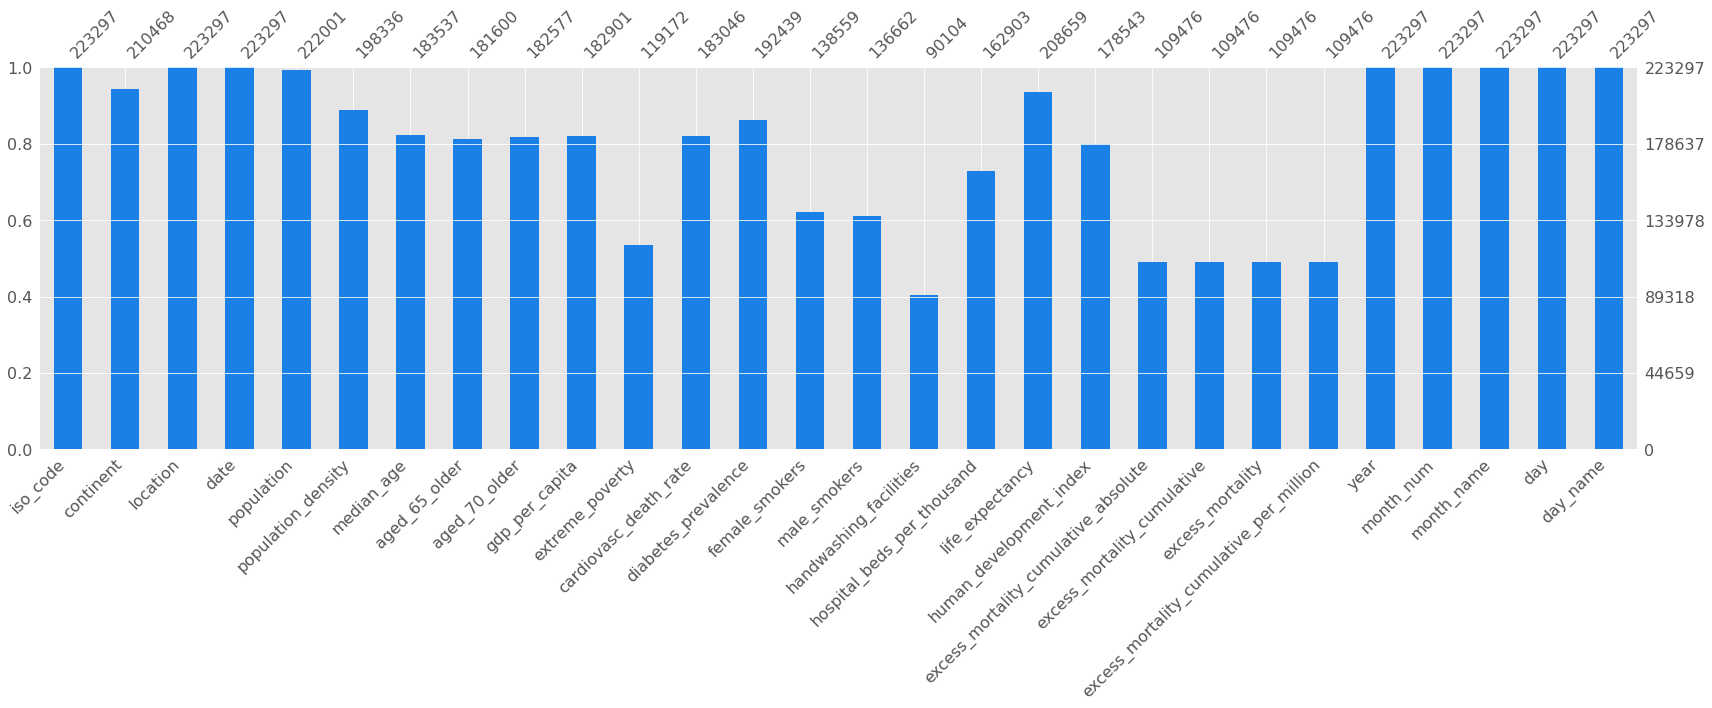

In [91]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

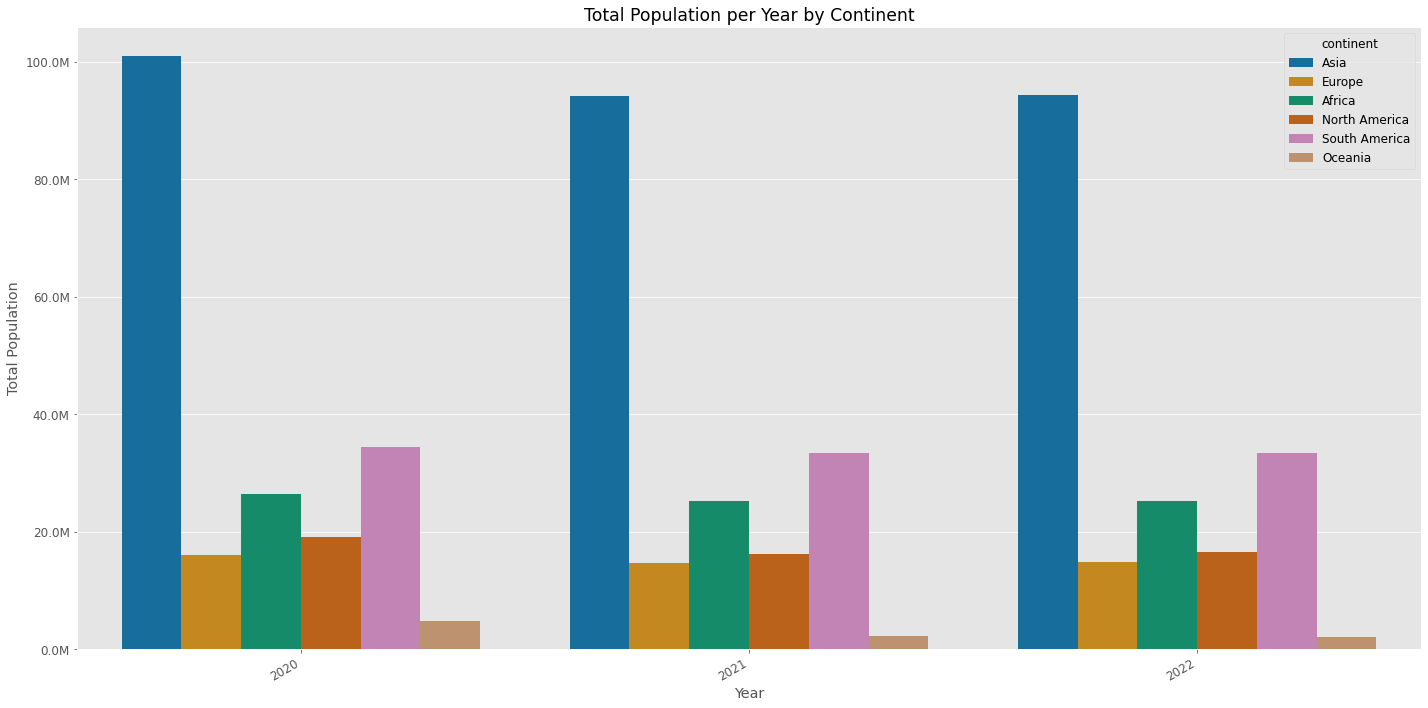

In [92]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', palette='colorblind',
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

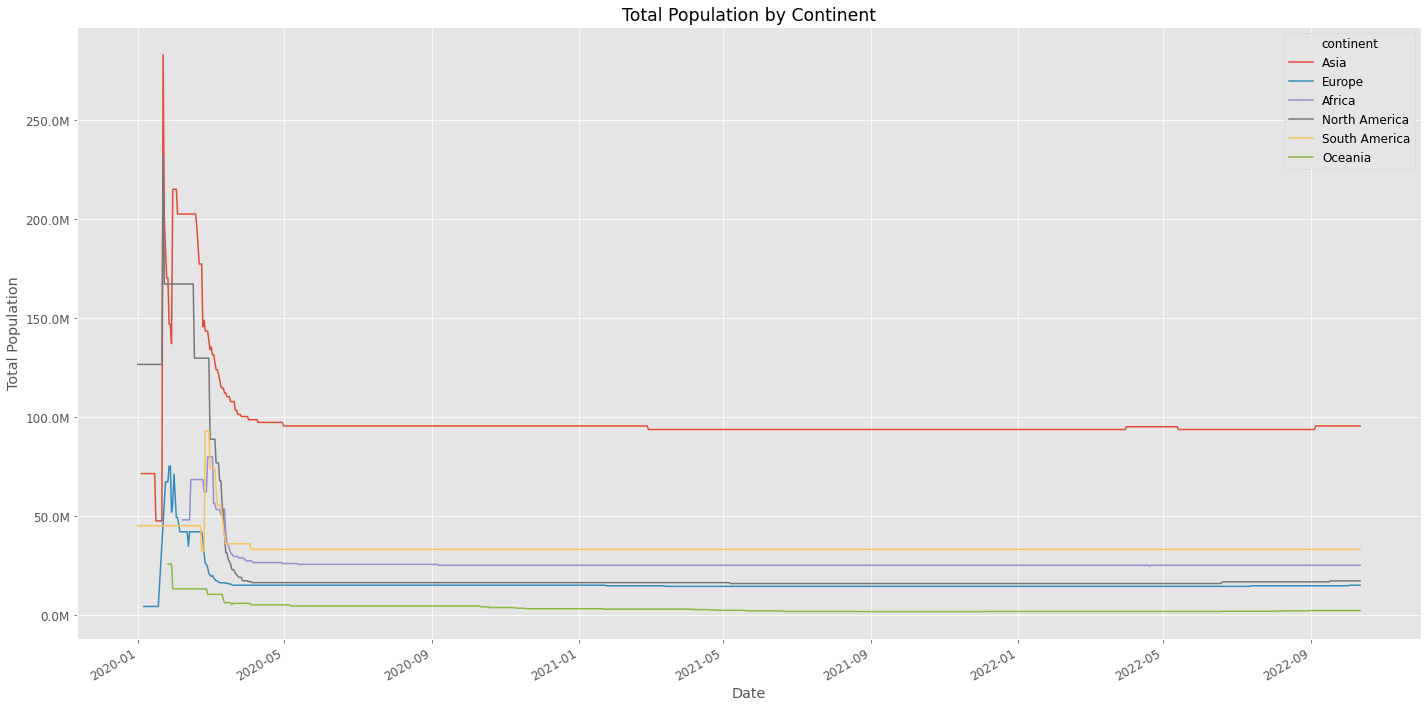

In [93]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

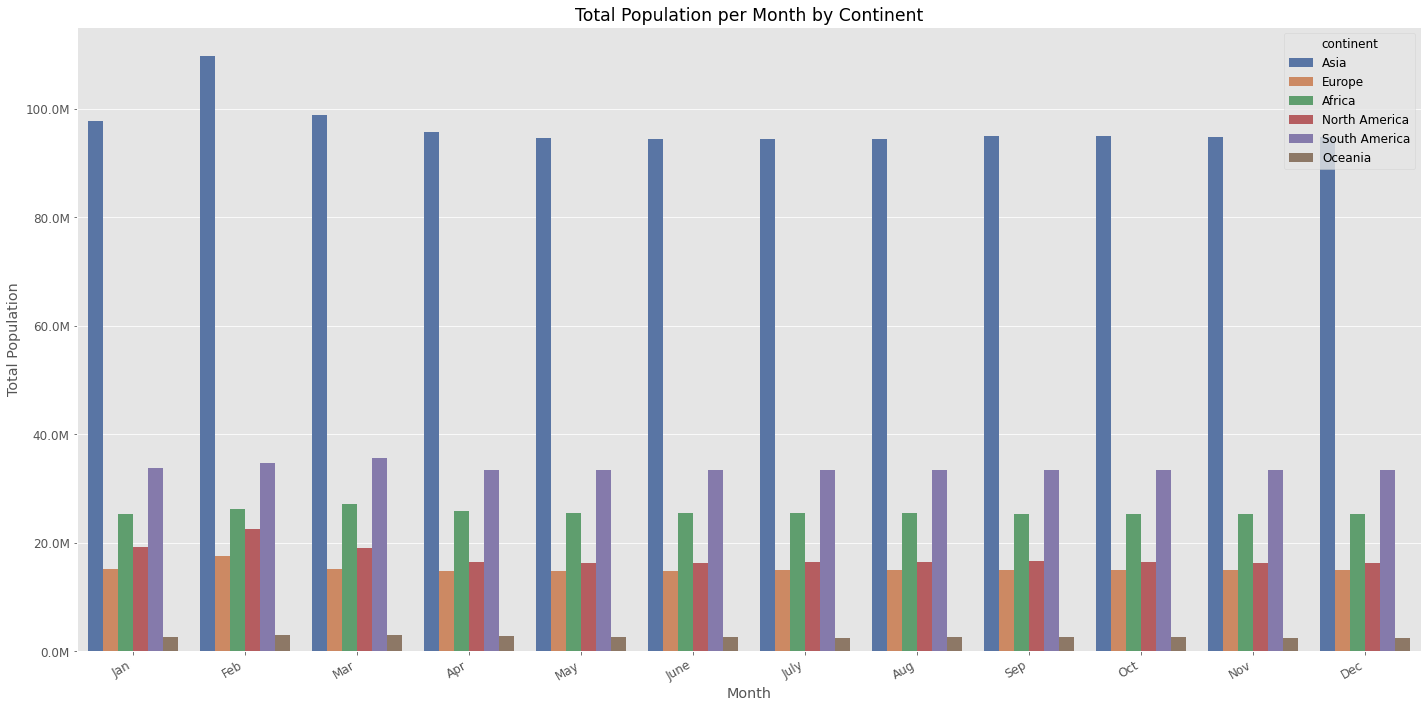

In [94]:
plot_bar(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='deep',
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

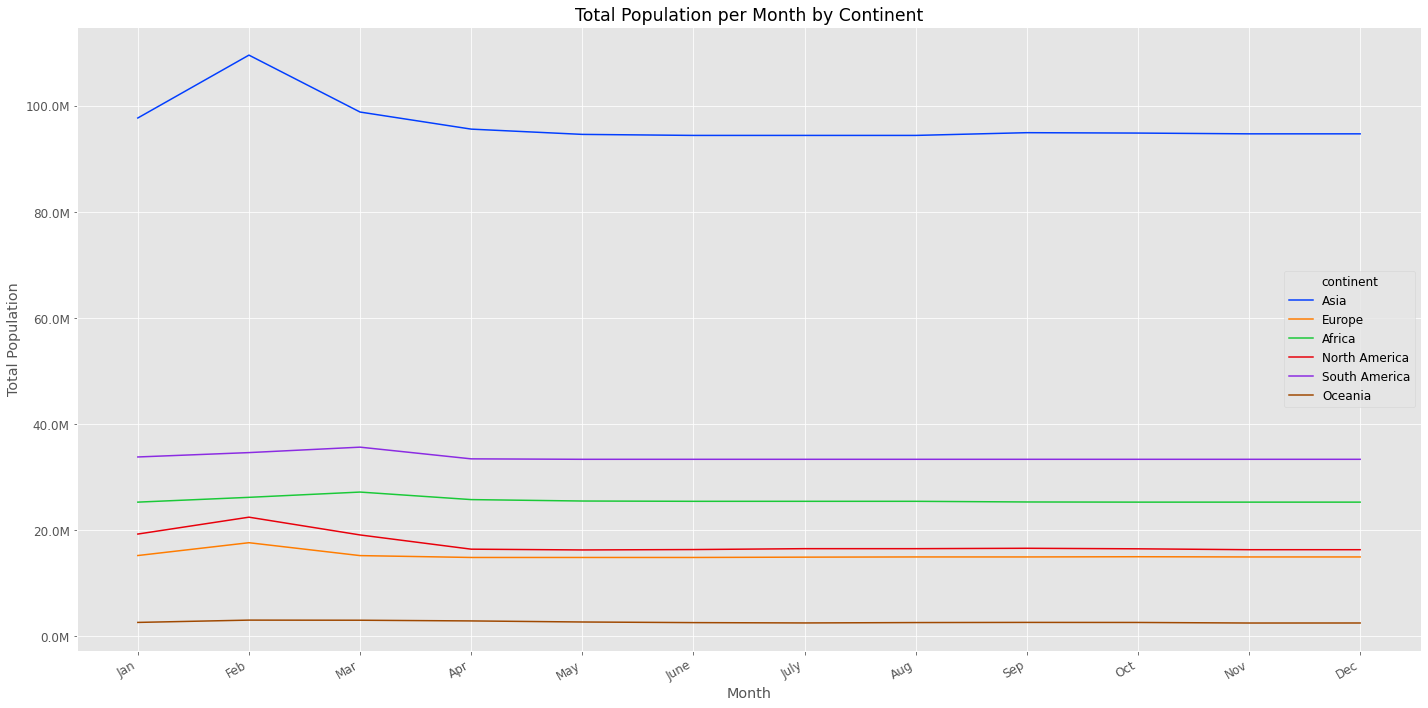

In [95]:
plot_line(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='bright', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

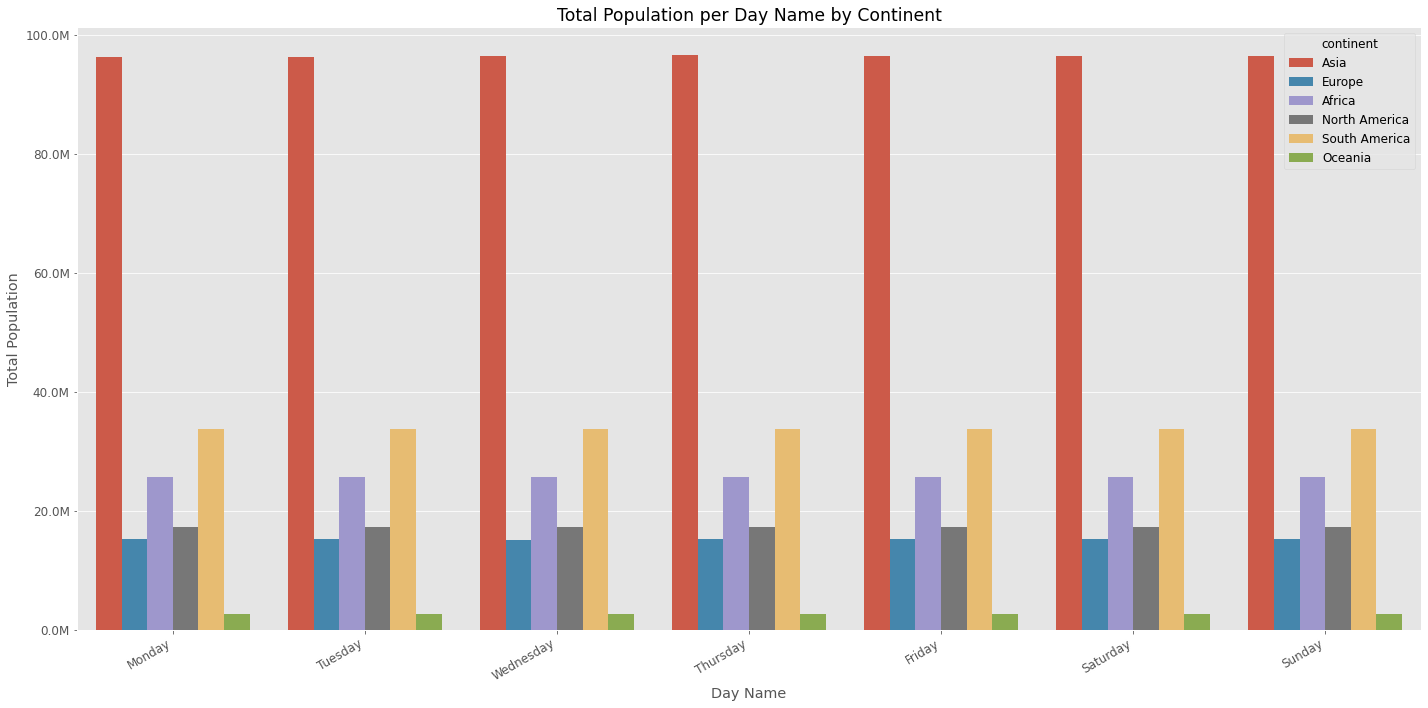

In [96]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

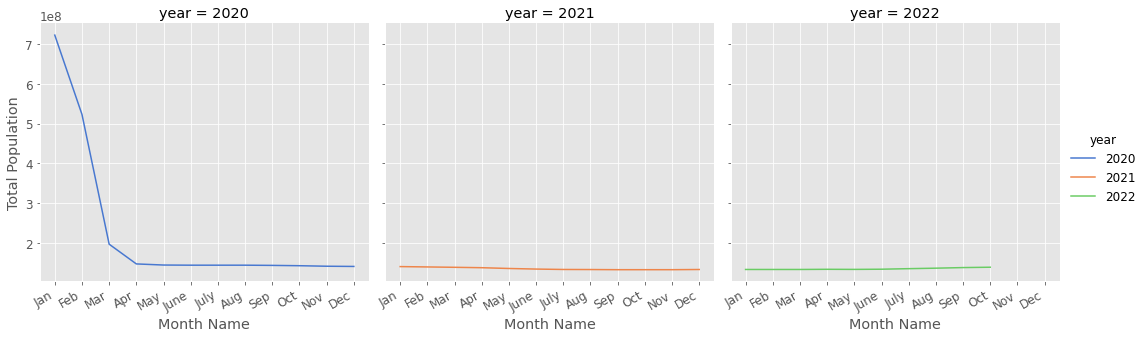

In [97]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

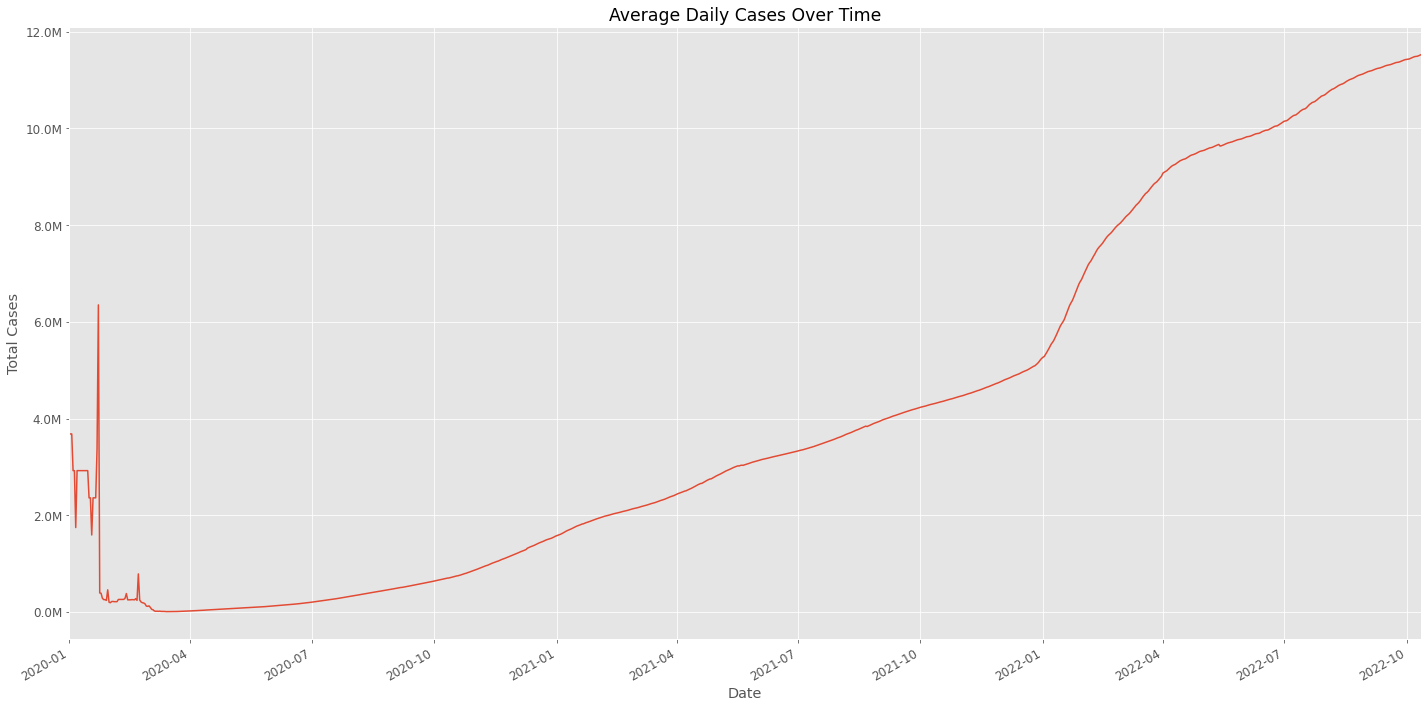

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

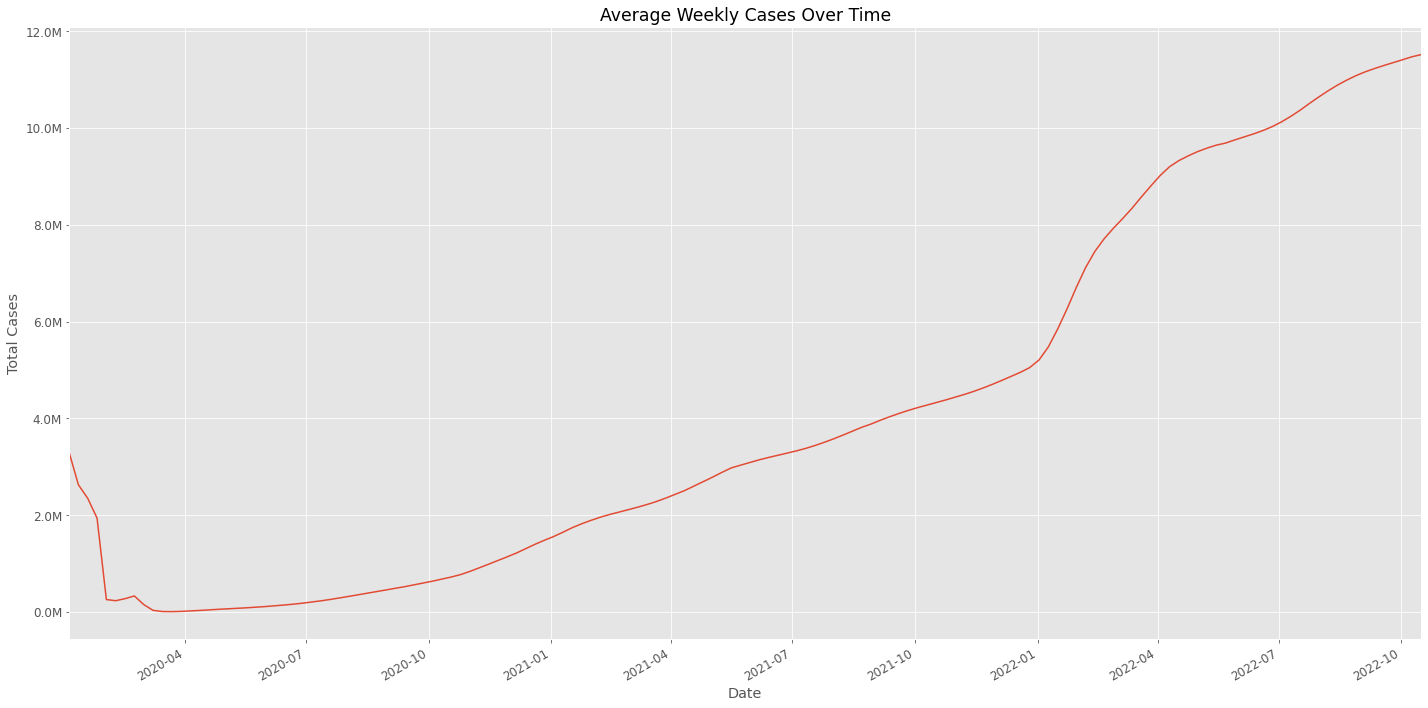

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

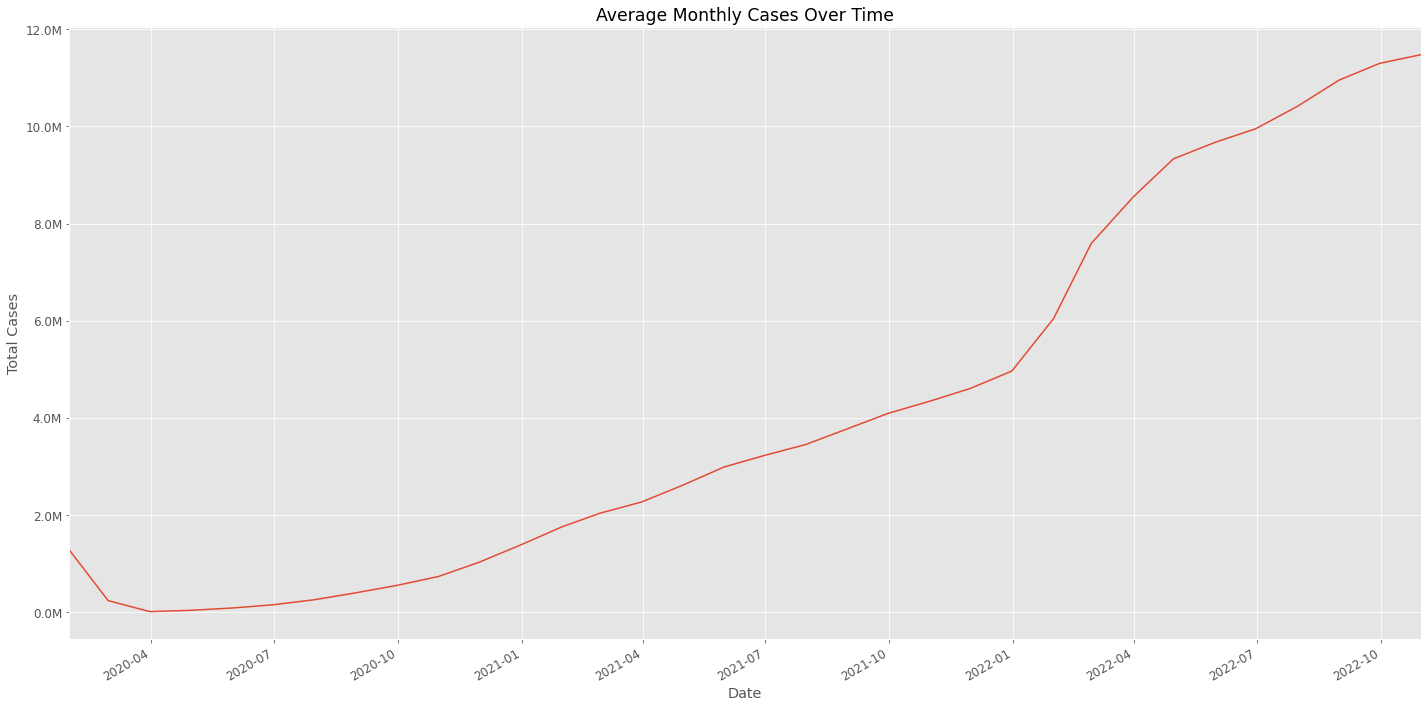

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

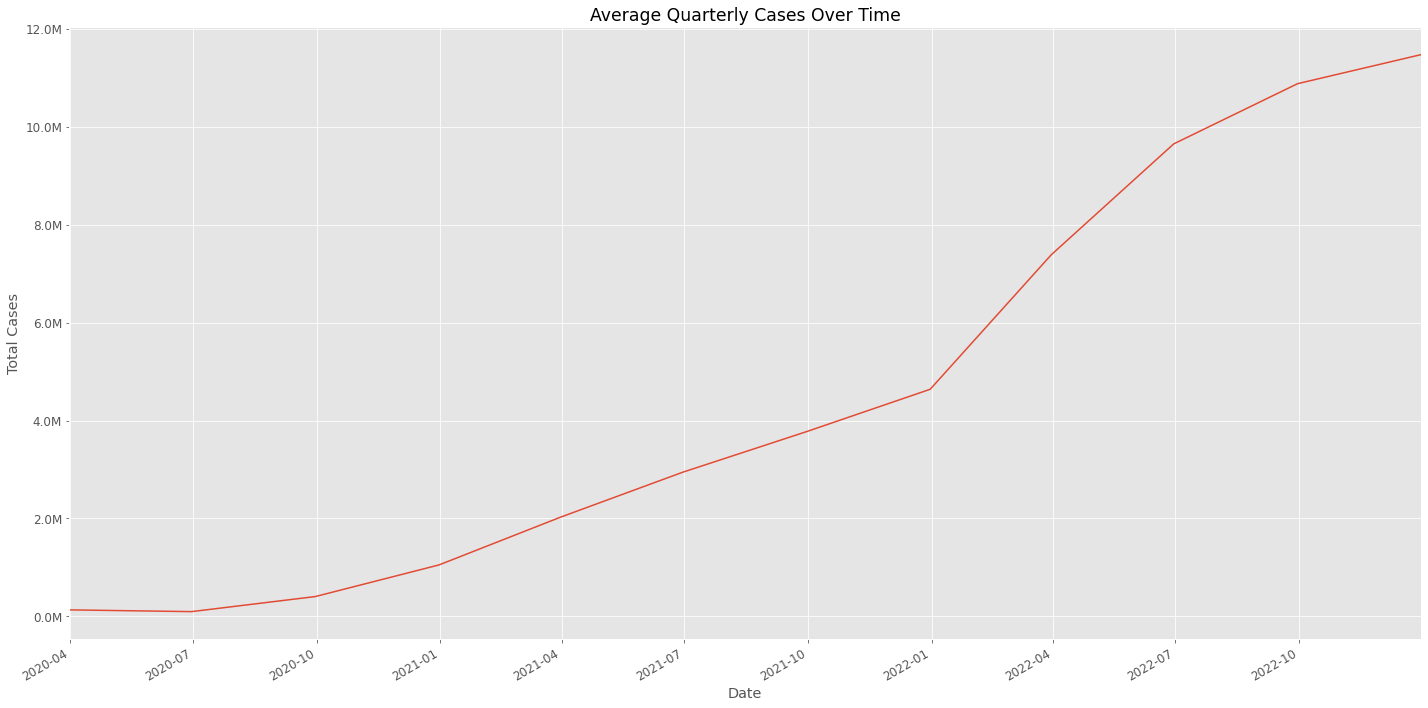

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

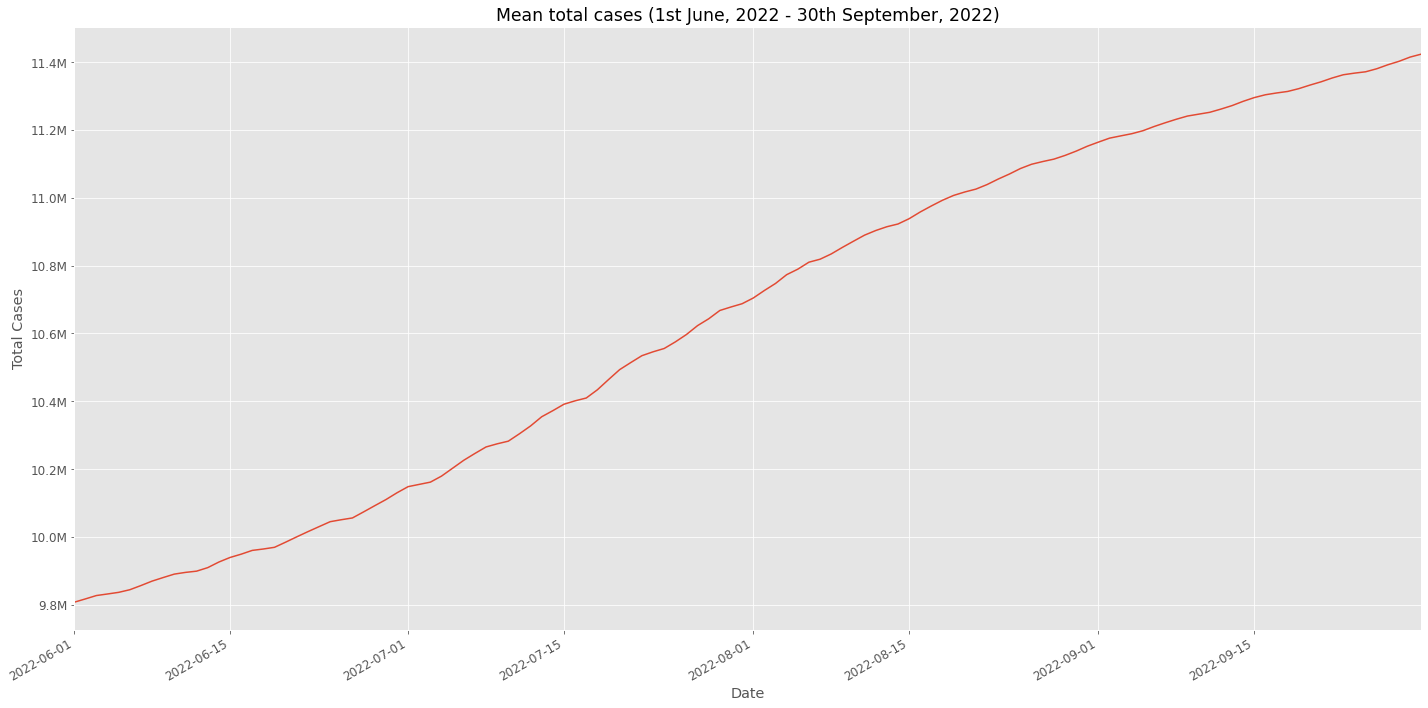

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-06-01', after='2022-09-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st June, 2022 - 30th September, 2022)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

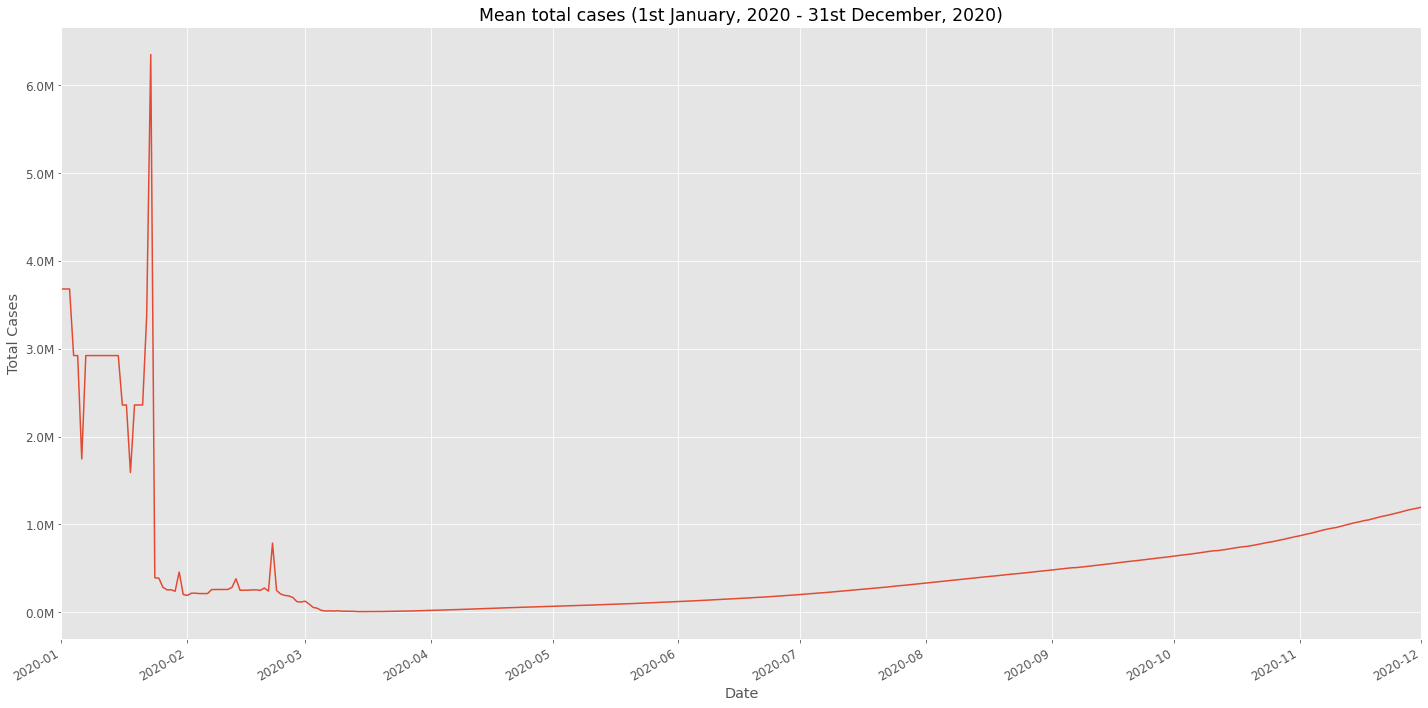

In [103]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

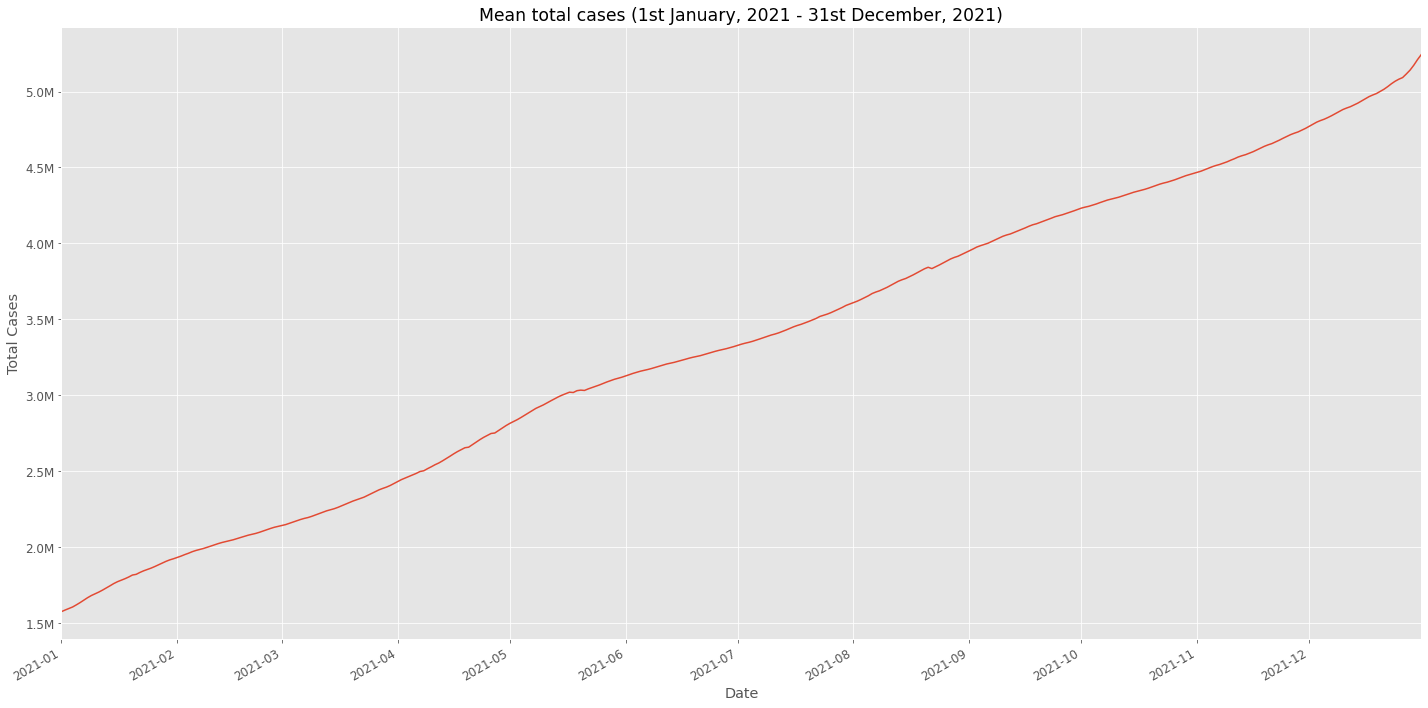

In [104]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

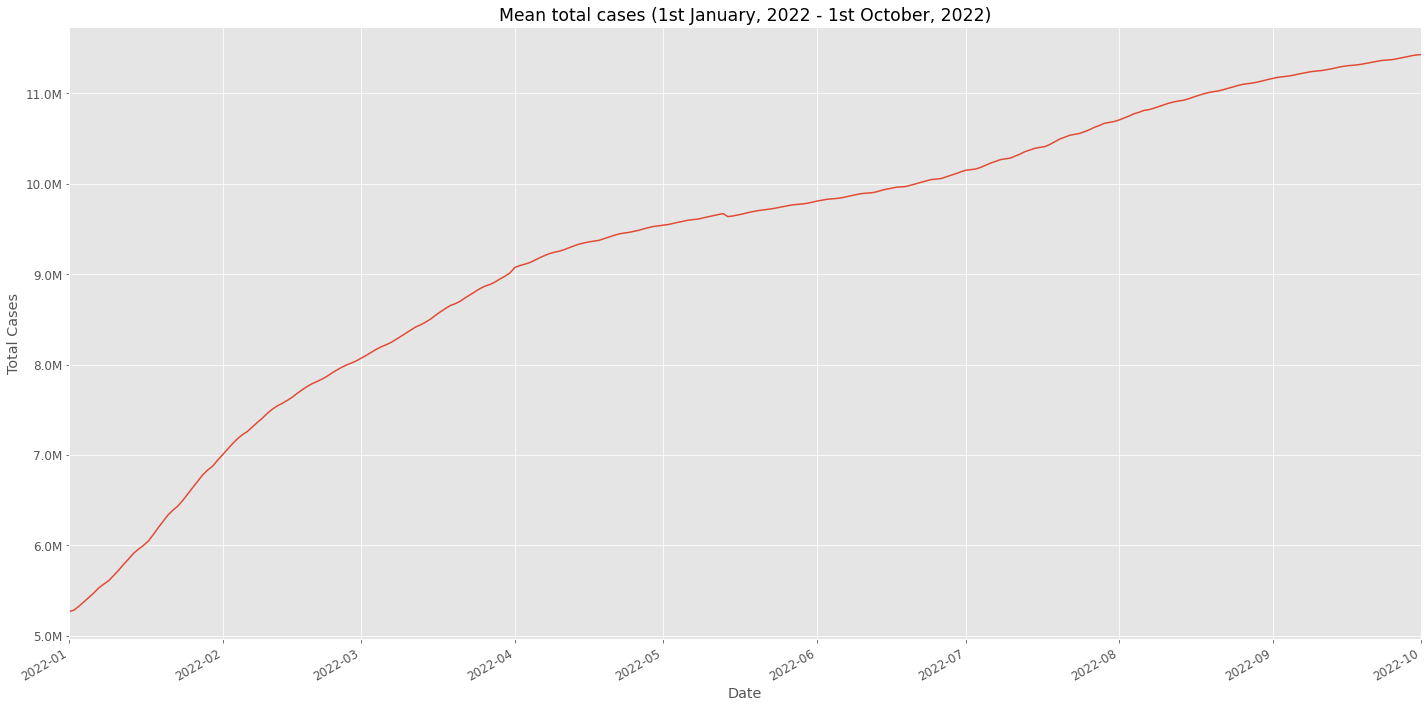

In [105]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-10-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st October, 2022)',
    formatter=format_mill
)